This code was mostly using this guide as reference
https://gist.github.com/analyticsindiamagazine/97f53c3a6ee5f63efea92e4159792f92#file-predicting_news_category_with_bert_in_tensorflow-ipynb

In [ ]:
%tensorflow_version 1.0.1


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.0.1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
!pip install bert-tensorflow==1.0.1


In [ ]:
import tensorflow as tf
print(tf.__version__)



1.15.2


In [ ]:
import pandas as pd
import tensorflow_hub as hub
from datetime import datetime
from sklearn.model_selection import train_test_split
import os

print("tensorflow version : ", tf.__version__)
print("tensorflow_hub version : ", hub.__version__)

tensorflow version :  1.15.2
tensorflow_hub version :  0.12.0


In [ ]:
#Importing BERT modules
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization


In [ ]:
from google.colab import drive
drive.mount("/GD")

Drive already mounted at /GD; to attempt to forcibly remount, call drive.mount("/GD", force_remount=True).


In [ ]:
# Set the output directory for saving model file
OUTPUT_DIR = '/GD/My Drive/Colab Notebooks/BERT/bert_fandom_category'

#@markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = False #@param {type:"boolean"}

if DO_DELETE:
  try:
    tf.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category *****


Loading The Data

We will now load the data from a Google Drive directory and will also split the training set in to training and validation sets.

In [ ]:
import pandas as pd

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
df3=pd.read_csv('/GD/My Drive/Colab Notebooks/Fanfiction/rating.csv')

In [ ]:
df2=pd.read_csv('/GD/My Drive/Colab Notebooks/Fanfiction/fanficbodies.csv')

In [ ]:
import io
# df2 = pd.read_csv(io.BytesIO(uploaded['fanficbodies.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# df3 = pd.read_csv(io.BytesIO(uploaded['rating.csv']))

In [ ]:
# let's read in our flower data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
train = df2
test = df3

from sklearn.model_selection import train_test_split

train, val =  train_test_split(train, test_size = 0.2, random_state = 100)

TODO: I want to scrape more fanfics to make a file with only the 4 fandoms the training data is trained on. df3 has like way more than 4 fandoms... 

In [ ]:
#Training set sample
train.head(5)

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
278,37723363,Inverno dei fiori.,['pollyna (rainingashonFlorence)'],General Audiences,M/M,James Bond (Craig Movies),James Bond/Q,"Q (James Bond), James Bond, Q's Family (James ...","Q-centric (James Bond), Thomas is Q's name, Q'...",English,...,2022-03-14,2187,1/1,2.0,54.0,1.0,590,"['TheUltimateOutlaw', 'The58thAcademic', 'Gala...",[],"\n\n""Tu insegnami come si fa ad imparare la fe..."
6,36187171,Que chantent les mots,['Maeglin_Surion'],Mature,"Gen, M/M, F/M","Original Work, Arsene Lupin - Maurice Leblanc,...","Isidore Beautrelet & Arsene Lupin, Isidore Bea...","Jim Gordon, Loki (Marvel), Francis Abernathy","Discord: Les defis galactiques, Drabble, Drabb...",Francais,...,2022-04-01,5100,51/78,341.0,15.0,1.0,689,"['badwolfkaily', 'Felicia_Vardya', 'Aishi_66',...",[],"Original Work * Parfois, il n'est nul besoin d..."
149,552777,No Fare,['PrettyArbitrary'],Teen And Up Audiences,Gen,"Sherlock (TV), Sherlock Holmes & Related Fandoms",NaN,"John Watson, Cabbie (Sherlock)","Episode: s01e01 A Study in Pink, AU, BAMF!John",English,...,2012-11-02,1996,1/1,320.0,8247.0,2060.0,67286,"['its_vrai', 'ItsAlwaysTheQuietOnes', 'Cecicol...",[],"For a moment, in Piccadilly, John thinks he he..."
307,38110009,Unforgettable,['Savetheflyingmonkeys'],Teen And Up Audiences,F/M,Harry Potter - J. K. Rowling,Hermione Granger/Fred Weasley,"Hermione Granger, Fred Weasley, Original Femal...","Fluff, Tooth-Rotting Fluff, Songfic, Song Lyri...",English,...,2022-04-02,750,1/1,NaN,6.0,NaN,84,['Presley161'],[],"""Now that we've talked in depth about the expa..."
103,187762,and stand there at the edge of my affection,['coloredink'],General Audiences,M/M,Sherlock (TV),Sherlock Holmes/John Watson,"Sherlock Holmes, John Watson","John takes a while to catch on, Sherlock is lo...",English,...,2011-04-20,2683,1/1,847.0,20013.0,3216.0,208276,"['concrete', 'fallenxyz', 'ItsAHelmet', 'campi...",[],"""John.""\n\n""Mmm?"" John paused in his shaving ..."


In [ ]:
#Test set sample
test.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,36043723,Let's Talk About Dinosaurs,['hihellotya'],Mature,M/M,aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...,Ohm Pawat Chittsawangdee/Nanon Korapat Kirdpan...,"Ohm Pawat Chittsawangdee, Nanon Korapat Kirdpa...","doctor and archaeologists, Romance, I'm Bad At...",English,...,2022-04-07,22412,10/?,25.0,74.0,7.0,1931,"['Purple_passiflora', 'tazparrow', 'coffeecup7...",[],Notes:\n\n \n\nNyasasaurus Pirringtoni is beli...
1,37775314,Resurrected,['BlueClanMarkings'],Explicit,F/M,Mass Effect Trilogy,Female Shepard/Garrus Vakarian,"Garrus Vakarian, Tali'Zorah nar Rayya, Miranda...","Infiltrator (Mass Effect), Normandy-SR2, Mass ...",English,...,2022-04-07,127885,15/?,19.0,42.0,4.0,951,"['Consumeroffanfics', 'lgiu', 'marantonia', 'D...",[],I opened my eyes and stared at a white ceiling...
2,35885656,Silent Night ~ Christmas Eve with Severus Snap...,['Prince_Sev'],Mature,F/M,Harry Potter - J. K. Rowling,"Severus Snape/Reader, Severus Snape/You, Sever...",Severus Snape,"Christmas, Christmas Fluff, Holidays, One Shot...",English,...,2022-04-07,13306,8/?,32.0,58.0,10.0,1031,"['sunsilverstar18', 'melyllvlol', 'Loyallonewo...",[],\n\n\nChristmas. Your favourite time of year....
3,38222218,Flower Day,['ceeloveswriting'],General Audiences,F/M,"Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z...","Fushiguro Megumi/Original Female Character(s),...",Fushiguro Megumi,"Alternate Universe, Reincarnation, Soulmates, ...",English,...,2022-04-07,1231,1/1,NaN,NaN,NaN,0,[],[],It comes in a split second where their eyes me...
4,38222215,Proximity,['Pire'],General Audiences,F/M,Pu nohiroakademia | Boku no Hero Academia | My...,"Amajiki Tamaki/Hadou Nejire, Amajiki Tamaki & ...","Hadou Nejire, Amajiki Tamaki","Tamajire, Tamaneji, Nejitama - Freeform, Slow ...",English,...,2022-04-07,1125,1/1,NaN,NaN,NaN,0,[],[],He stopped suddenly as he passed the living ro...


actually maybe I'll drop the non english stuff at the end...

In [ ]:
# \r and \n
df2['Body_Parsed_1'] = df2['body'].str.replace("\r", " ")
df2['Body_Parsed_1'] = df2['Body_Parsed_1'].str.replace("\n", " ")
df2['Body_Parsed_1'] = df2['Body_Parsed_1'].str.replace("    ", " ")
df2['Body_Parsed_1'] = df2['Body_Parsed_1'].str.replace("\t", " ")

I need to clean this up a little before I start doing stuff...


In [ ]:
## rows with multiple fandoms eliminate? 
sc = 0
mc = 0
list_drop = []
for i in range(len(df2)):
    fandom_list = df2['fandom'][i]
    fandom_list = fandom_list.split(",")
#     print(fandom_list)
    if len(fandom_list) == 1:
        if fandom_list[0] == 'Six of Crows Series - Leigh Bardugo':
            sc+=1
        elif fandom_list[0] == 'Sherlock (TV)' :
            sc+=1
        elif fandom_list[0] == 'James Bond (Craig Movies)' :
            sc+=1
        elif fandom_list[0] == 'Harry Potter - J. K. Rowling':
            sc+=1
        else:
            list_drop += [i]
    else:
        #drop the ones that are multifandom 
        list_drop += [i]
        mc+=1
print(list_drop)

print(f'{sc} that are only one fandom')
print(f'{mc} that are multifandom')    
    

[2, 3, 6, 7, 9, 10, 12, 13, 14, 16, 19, 22, 23, 24, 25, 26, 27, 28, 31, 32, 40, 44, 45, 46, 49, 50, 51, 53, 56, 57, 60, 61, 62, 63, 68, 73, 75, 76, 77, 86, 89, 90, 91, 92, 95, 96, 98, 99, 100, 104, 107, 109, 116, 118, 122, 124, 126, 127, 129, 132, 135, 137, 138, 140, 142, 143, 144, 148, 149, 150, 155, 157, 161, 167, 168, 170, 172, 173, 174, 181, 182, 183, 184, 194, 195, 201, 202, 212, 213, 217, 218, 219, 220, 224, 225, 226, 227, 228, 231, 233, 234, 235, 239, 240, 242, 250, 251, 254, 256, 265, 268, 270, 271, 273, 277, 279, 280, 281, 282, 283, 289, 291, 294, 300, 304, 311, 318, 323, 332, 334, 335, 338, 349, 352, 354, 356, 363, 370, 377, 383]
246 that are only one fandom
138 that are multifandom


In [ ]:
##put only english stuff in the thing
list1 = []
for i in range(0, len(df2)):
    if df2['language'][i] != "English":
        if i not in list_drop:
            list1+=[i]
print(list1)
for value in list1:
    list_drop += [value]
    
print(list_drop)

[198, 205, 210, 215, 221, 229, 237, 238, 241, 243, 244, 245, 246, 247, 248, 253, 257, 262, 266, 274, 284, 351, 368, 374, 378, 382]
[2, 3, 6, 7, 9, 10, 12, 13, 14, 16, 19, 22, 23, 24, 25, 26, 27, 28, 31, 32, 40, 44, 45, 46, 49, 50, 51, 53, 56, 57, 60, 61, 62, 63, 68, 73, 75, 76, 77, 86, 89, 90, 91, 92, 95, 96, 98, 99, 100, 104, 107, 109, 116, 118, 122, 124, 126, 127, 129, 132, 135, 137, 138, 140, 142, 143, 144, 148, 149, 150, 155, 157, 161, 167, 168, 170, 172, 173, 174, 181, 182, 183, 184, 194, 195, 201, 202, 212, 213, 217, 218, 219, 220, 224, 225, 226, 227, 228, 231, 233, 234, 235, 239, 240, 242, 250, 251, 254, 256, 265, 268, 270, 271, 273, 277, 279, 280, 281, 282, 283, 289, 291, 294, 300, 304, 311, 318, 323, 332, 334, 335, 338, 349, 352, 354, 356, 363, 370, 377, 383, 198, 205, 210, 215, 221, 229, 237, 238, 241, 243, 244, 245, 246, 247, 248, 253, 257, 262, 266, 274, 284, 351, 368, 374, 378, 382]


In [ ]:
ROW = 0
COLUMN = 1

df2_clean = df2.drop(list_drop, axis=ROW)
df2_clean

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body,Body_Parsed_1
0,38068225,A Hundred Theories,['genuineformality'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,Kaz Brekker/Inej Ghafa,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...",English,...,2091,1/1,32.0,82.0,4.0,387,"['majeda', 'crackbaby13', 'Starryskyondragonsb...",[],"\n\nKaz hated a puzzle he couldn't solve, and ...","Kaz hated a puzzle he couldn't solve, and he..."
1,38010298,i'll tell you all about it (when i see you again),['people_watching'],Not Rated,NaN,Six of Crows Series - Leigh Bardugo,"Matthias Helvar/Nina Zenik, Kaz Brekker/Inej G...","Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",English,...,2656,3/6,4.0,17.0,1.0,258,"['carry_on_simon', 'Elevatornotworthy_1', 'Oli...",[],Matthias can barely hear himself think with th...,Matthias can barely hear himself think with th...
4,38066179,save me from myself (don't let me down),['xxartistintrainingxx'],Teen And Up Audiences,M/M,Six of Crows Series - Leigh Bardugo,Jesper Fahey/Wylan Van Eck,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",English,...,2174,1/1,4.0,36.0,4.0,397,"['ThatOddNerd', 'bee_slut', 'Reader2005', 'Boo...",[],Wylan gasped and thrashed as he struggled to s...,Wylan gasped and thrashed as he struggled to s...
5,37607470,"You fell from the tree again, didn't you?",['AlphaZeroAce'],Teen And Up Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",English,...,2989,4/?,NaN,18.0,2.0,477,"['Adore_reading', 'bookworm_krisi1', 'StarRose...",[],\n\nKaz was sitting under the tree in the back...,Kaz was sitting under the tree in the backya...
8,37590898,You knew them,['AlphaZeroAce'],General Audiences,NaN,Six of Crows Series - Leigh Bardugo,"Kaz Brekker & Jesper Fahey, Kaz Brekker & Jord...","Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",English,...,5391,5/?,3.0,63.0,6.0,1029,"['FangirlFreak08', 'Catduck', 'dontloseyourhea...",[],\n\nWhy did I come here. Kaz thought as Colm w...,Why did I come here. Kaz thought as Colm wen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,38106952,The doe and the stag,['marlo_zart'],Teen And Up Audiences,F/M,Harry Potter - J. K. Rowling,James Potter/Lily Evans Potter,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",English,...,1600,1/?,NaN,3.0,NaN,49,[],[],James finds Lily after a distressing letter fr...,James finds Lily after a distressing letter fr...
380,38096989,Payback is a real bitch,['x_manga_Bleach_x'],Explicit,M/M,Harry Potter - J. K. Rowling,"Draco Malfoy/Lucius Malfoy, Harry Potter & Fre...","Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",English,...,2335,1/1,1.0,36.0,7.0,512,"['Junebug_27', 'FuzzPuzzBuzz', 'shiggyonthebea...",[],Harry huffed when he saw the headlines of the ...,Harry huffed when he saw the headlines of the ...
381,38106892,All Mine (and His),['maraudersaffair'],Explicit,F/M,Harry Potter - J. K. Rowling,"Hermione Granger/Draco Malfoy, Hermione Grange...","Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",English,...,5019,1/1,2.0,73.0,9.0,1916,"['Cookiemom14', 'JamesLethe', 'Trichardson', '...",[],Hermione wanted a baby. She wanted to be a mot...,Hermione wanted a baby. She wanted to be a mot...
384,31236521,In the Shadows (Wizarding War),['CL_Avery'],Mature,"F/M, Multi",Harry Potter - J. K. Rowling,"Sirius Black/Original Female Character(s), Jam...","Original Characters, Sirius Black, James Potte...","Wizardi

In [ ]:
# ##lets drop also the ... not rated
# list2 = []
# for i in range(0, len(df2)):
#     if df2['rating'][i] == "Not Rated":
#         if i not in list_drop:
#             list2+=[i]
# print(list2)
# we don't want to do this...

In [ ]:
df2_clean1 = df2_clean


In [ ]:
#Features in the dataset
train.columns

Index(['work_id', 'title', 'author', 'rating', 'category', 'fandom',
       'relationship', 'character', 'additional tags', 'language', 'published',
       'status', 'status date', 'words', 'chapters', 'comments', 'kudos',
       'bookmarks', 'hits', 'all_kudos', 'all_bookmarks', 'body'],
      dtype='object')

In [ ]:
fandom_codes = {
    'Six of Crows Series - Leigh Bardugo': 0,
    'Sherlock (TV)': 1,
    'James Bond (Craig Movies)': 2,
    'Harry Potter - J. K. Rowling': 3,
}

In [ ]:
list_columns = ["title", "rating", "fandom", "character", "additional tags", "body", "Body_Parsed_1"]
df2_clean1 = df2_clean1[list_columns]


In [ ]:
# Category mapping
df2_clean1['Fandom_Code'] = df2_clean1['fandom']
df2_clean1 = df2_clean1.replace({'Fandom_Code':fandom_codes})
df2_clean1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,rating,fandom,character,additional tags,body,Body_Parsed_1,Fandom_Code
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ...","Kaz hated a puzzle he couldn't solve, and he...",0
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,"Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Matthias can barely hear himself think with th...,Matthias can barely hear himself think with th...,0
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Wylan gasped and thrashed as he struggled to s...,Wylan gasped and thrashed as he struggled to s...,0
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",\n\nKaz was sitting under the tree in the back...,Kaz was sitting under the tree in the backya...,0
8,You knew them,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",\n\nWhy did I come here. Kaz thought as Colm w...,Why did I come here. Kaz thought as Colm wen...,0
...,...,...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,Harry Potter - J. K. Rowling,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",James finds Lily after a distressing letter fr...,James finds Lily after a distressing letter fr...,3
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,"Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",Harry huffed when he saw the headlines of the ...,Harry huffed when he saw the headlines of the ...,3
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,"Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",Hermione wanted a baby. She wanted to be a mot...,Hermione wanted a baby. She wanted to be a mot...,3
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,"Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",\n\n\n\n\n\nClaudia opened her eyes and glance...,Claudia opened her eyes and glanced at the ...,3


In [ ]:
train = df2_clean1
train

,title,rating,fandom,character,additional tags,body,Body_Parsed_1,Fandom_Code
0,A Hundred Theories,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Inej Ghafa","Pre-Canon, Developing Friendships, Kaz Brekker...","\n\nKaz hated a puzzle he couldn't solve, and ...","Kaz hated a puzzle he couldn't solve, and he...",0
1,i'll tell you all about it (when i see you again),Not Rated,Six of Crows Series - Leigh Bardugo,"Matthias Helvar, Wylan Van Eck, Inej Ghafa, Ni...","Post-Book 2: Crooked Kingdom, Spoilers for Cro...",Matthias can barely hear himself think with th...,Matthias can barely hear himself think with th...,0
4,save me from myself (don't let me down),Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Wylan Van Eck, Jesper Fahey","Nightmares, Hurt/Comfort, Angst, Wylan Van Eck...",Wylan gasped and thrashed as he struggled to s...,Wylan gasped and thrashed as he struggled to s...,0
5,"You fell from the tree again, didn't you?",Teen And Up Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Jordie Rietveld, Jesper Fahey","Past, Kaz Brekker & Jesper Fahey Friendship, Y...",\n\nKaz was sitting under the tree in the back...,Kaz was sitting under the tree in the backya...,0
8,You knew them,General Audiences,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Kaz Brekker's Father, Kaz Brekker...","Character Death, Jordie Rietveld Lives, Big Br...",\n\nWhy did I come here. Kaz thought as Colm w...,Why did I come here. Kaz thought as Colm wen...,0
...,...,...,...,...,...,...,...,...
379,The doe and the stag,Teen And Up Audiences,Harry Potter - J. K. Rowling,"James Potter, Lily Evans Potter, Minerva McGon...","Hurt/Comfort, Fluff, Marriage Proposal",James finds Lily after a distressing letter fr...,James finds Lily after a distressing letter fr...,3
380,Payback is a real bitch,Explicit,Harry Potter - J. K. Rowling,"Harry Potter, Fred Weasley, George Weasley, Lu...","Revenge, Public Humiliation, Insane Harry Pott...",Harry huffed when he saw the headlines of the ...,Harry huffed when he saw the headlines of the ...,3
381,All Mine (and His),Explicit,Harry Potter - J. K. Rowling,"Hermione Granger, Draco Malfoy, Charlie Weasley","Threesome - F/M/M, Polyamory, Getting Together...",Hermione wanted a baby. She wanted to be a mot...,Hermione wanted a baby. She wanted to be a mot...,3
384,In the Shadows (Wizarding War),Mature,Harry Potter - J. K. Rowling,"Original Characters, Sirius Black, James Potte...","Wizarding Wars (Harry Potter), Order of the Ph...",\n\n\n\n\n\nClaudia opened her eyes and glance...,Claudia opened her eyes and glanced at the ...,3


In [ ]:
from sklearn.model_selection import train_test_split

train, val =  train_test_split(train, test_size = 0.2, random_state = 100)

In [ ]:
train.columns

Index(['title', 'rating', 'fandom', 'character', 'additional tags', 'body',
       'Body_Parsed_1', 'Fandom_Code'],
      dtype='object')

In [ ]:
#unique classes
train['Fandom_Code'].unique()

array([3, 2, 0, 1])

In [ ]:
df_tidy = train

In [ ]:
filename = "fanficbodies.csv"

In [ ]:
#
# That's it!  Then, and write it out to iris_cleaned.csv

# We'll construct the new filename:

old_basename = filename[:-4]                      # remove the ".csv"
cleaned_filename = old_basename + "_cleaned.csv"  # name-creating
print(f"cleaned_filename is {cleaned_filename}")

# Now, save
df_tidy.to_csv(cleaned_filename, index_label=False)  # no "index" column...

cleaned_filename is fanficbodies_cleaned.csv


In [ ]:
df_tidy_reread = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df_tidy_reread

fanficbodies.csv : file read into a pandas dataframe.


,title,rating,fandom,character,additional tags,body,Body_Parsed_1,Fandom_Code
316,Black Stag,Mature,Harry Potter - J. K. Rowling,"Regulus Black, James Potter, Sirius Black, Rem...","Jegulus, wolfstar, Canonical Character Death, ...",The lamp leaked a watery orange light over Reg...,The lamp leaked a watery orange light over Reg...,3
296,Devil's Helmet,Not Rated,Harry Potter - J. K. Rowling,"Tom Riddle, You, Reader",NaN,\n\n \n\nSlow.\n\nEverything was more beautif...,Slow. Everything was more beautiful when p...,3
319,Sunspots,Explicit,Harry Potter - J. K. Rowling,"Harry Potter, Horcruxes - Character, Tom Riddl...","Alternate Universe - Canon Divergence, Horcrux...","\n\n \n\nHarry watched the Riddles, and the R...","Harry watched the Riddles, and the Riddles ...",3
359,In Somnis Veritas,General Audiences,Harry Potter - J. K. Rowling,"Harry Potter, Severus Snape, Hermione Granger,...","Severitus, Sevitus",\n\n ...,"""Let the feast begin!""...",3
272,Orpheus,Explicit,James Bond (Craig Movies),"Q (James Bond), Raoul Silva | Tiago Rodriguez,...","Aftermath of Torture, Past Child Abuse, BAMF Q...",Recommended Listening: Keep On Loving You // C...,Recommended Listening: Keep On Loving You // C...,2
...,...,...,...,...,...,...,...,...
159,"To Sleep, Perchance to Smother Your Flatmate w...",General Audiences,Sherlock (TV),"Sherlock Holmes, John Watson","Johnlock if you want it to be, but works fine ...","""You're not sleeping with me.""\n""Why not? It's...","""You're not sleeping with me."" ""Why not? It's ...",1
186,Evening Ride,Explicit,Sherlock (TV),"Sherlock Holmes, John Watson","Groping, Frottage, Humiliation kink, Humiliati...",John Watson sighs as he pushes his way into th...,John Watson sighs as he pushes his way into th...,1
121,Saving Sherlock Holmes,Mature,Sherlock (TV),"Sherlock Holmes, Mycroft Holmes, Mrs. Hudson, ...","Teenlock, AU, Schoolboy AU",Part I\n\nChapter One\n\n\nOctober 1987\n\n\nT...,Part I Chapter One October 1987 The thing...,1
48,We All Fall,Not Rated,Six of Crows Series - Leigh Bardugo,"Kaz Brekker, Inej Ghafa, Nina Zenik, Jesper Fa...","Angst, Hurt/Comfort, Alternate Universe, Dark ...",It's December 31st and the winter holidays are...,It's December 31st and the winter holidays are...,0


Note: I need to make a test set for fandom because ratings.csv has multifandoms ... besides Sherlock, Six of Crows, James Bond and Harry Potter... but I'll do that later

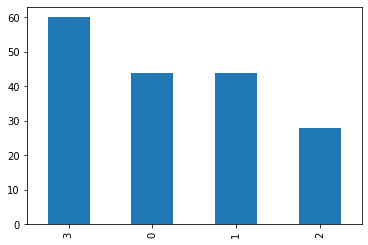

In [ ]:
#Distribution of classes
train['Fandom_Code'].value_counts().plot(kind = 'bar')

In [ ]:
DATA_COLUMN = 'Body_Parsed_1'
LABEL_COLUMN = 'Fandom_Code'
# The list containing all the classes (train['SECTION'].unique())
label_list = [0, 1, 2, 3]

In [ ]:
print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)
print("Test Set Shape :", test.shape)

Training Set Shape : (176, 8)
Validation Set Shape : (44, 8)
Test Set Shape : (505, 22)


Data Preprocessing
BERT model accept only a specific type of input and the datasets are usually structured to have have the following four features:

guid : A unique id that represents an observation.
text_a : The text we need to classify into given categories
text_b: It is used when we're training a model to understand the relationship between sentences and it does not apply for classification problems.
label: It consists of the labels or classes or categories that a given text belongs to.
In our dataset we have text_a and label. The following code block will create objects for each of the above mentioned features for all the records in our dataset using the InputExample class provided in the BERT library.

In [ ]:
train_InputExamples = train.apply(lambda x: bert.run_classifier.InputExample(guid=None,
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

val_InputExamples = val.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [ ]:
train_InputExamples

316    <bert.run_classifier.InputExample object at 0x...
296    <bert.run_classifier.InputExample object at 0x...
319    <bert.run_classifier.InputExample object at 0x...
359    <bert.run_classifier.InputExample object at 0x...
272    <bert.run_classifier.InputExample object at 0x...
                             ...                        
159    <bert.run_classifier.InputExample object at 0x...
186    <bert.run_classifier.InputExample object at 0x...
121    <bert.run_classifier.InputExample object at 0x...
48     <bert.run_classifier.InputExample object at 0x...
18     <bert.run_classifier.InputExample object at 0x...
Length: 176, dtype: object

In [ ]:
print("Row 0 - guid of training set : ", train_InputExamples.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", train_InputExamples.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", train_InputExamples.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", train_InputExamples.iloc[0].label)

Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  The lamp leaked a watery orange light over Regulus. It hadn't turned incredibly late yet, however, the sky had begun to bruise earlier and earlier as the wind had started to chill. Regulus enjoyed coming here, when the room was deathly silent, bar the sound of his own feet and shaken breath; it had helped the world feel less bleak and removed the feeling that everything around him was painstakingly empty. His lungs had begun to shrink so much they were near-shattering, filled an abundance of pressurised breath. Pandora had told him that should he overwork himself too much he'd end up not being able to perform at all. Regulus had decided he'd rather not perform as a result of an injury than suffer being given a mediocre part at best. He was destined for an actual role in the performance of Romeo and Juliet, he'd thought, and he wouldn't put up for less than Romeo- Barty had also then chimed in to say that

We will now get down to business with the pretrained BERT. In this example we will use the bert_uncased_L-12_H-768_A-12/1 model. To check all available versions click here.

We will be using the vocab.txt file in the model to map the words in the dataset to indexes. Also the loaded BERT model is trained on uncased/lowercase data and hence the data we feed to train the model should also be of lowercase.

In [ ]:
# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
#Here is what the tokenised sample of the first training set observation looks like
print(tokenizer.tokenize(train_InputExamples.iloc[0].text_a))

['the', 'lamp', 'leaked', 'a', 'watery', 'orange', 'light', 'over', 'reg', '##ulus', '.', 'it', 'hadn', "'", 't', 'turned', 'incredibly', 'late', 'yet', ',', 'however', ',', 'the', 'sky', 'had', 'begun', 'to', 'bruise', 'earlier', 'and', 'earlier', 'as', 'the', 'wind', 'had', 'started', 'to', 'chill', '.', 'reg', '##ulus', 'enjoyed', 'coming', 'here', ',', 'when', 'the', 'room', 'was', 'death', '##ly', 'silent', ',', 'bar', 'the', 'sound', 'of', 'his', 'own', 'feet', 'and', 'shaken', 'breath', ';', 'it', 'had', 'helped', 'the', 'world', 'feel', 'less', 'bleak', 'and', 'removed', 'the', 'feeling', 'that', 'everything', 'around', 'him', 'was', 'pains', '##taking', '##ly', 'empty', '.', 'his', 'lungs', 'had', 'begun', 'to', 'shrink', 'so', 'much', 'they', 'were', 'near', '-', 'shattering', ',', 'filled', 'an', 'abundance', 'of', 'press', '##uri', '##sed', 'breath', '.', 'pandora', 'had', 'told', 'him', 'that', 'should', 'he', 'over', '##work', 'himself', 'too', 'much', 'he', "'", 'd', 'en

We will now format out text in to input features which the BERT model expects. We will also set a sequence length which will be the length of the input features.

Okay so this is where you set the length

In [ ]:
MAX_SEQ_LENGTH = 512
#Convert our train and validation features to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)
  
val_features = bert.run_classifier.convert_examples_to_features(val_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

INFO:tensorflow:Writing example 0 of 176


INFO:tensorflow:Writing example 0 of 176


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the lamp leaked a watery orange light over reg ##ulus . it hadn ' t turned incredibly late yet , however , the sky had begun to bruise earlier and earlier as the wind had started to chill . reg ##ulus enjoyed coming here , when the room was death ##ly silent , bar the sound of his own feet and shaken breath ; it had helped the world feel less bleak and removed the feeling that everything around him was pains ##taking ##ly empty . his lungs had begun to shrink so much they were near - shattering , filled an abundance of press ##uri ##sed breath . pandora had told him that should he over ##work himself too much he ' d end up not being able to perform at all . reg ##ulus had decided he ' d rather not perform as a result of an injury than suffer being given a med ##io ##cre part at best . he was destined for an actual role in the performance of romeo and juliet , he ' d thought , and he wouldn ' t put up for less than romeo - bart ##y had also then chimed in t

INFO:tensorflow:tokens: [CLS] the lamp leaked a watery orange light over reg ##ulus . it hadn ' t turned incredibly late yet , however , the sky had begun to bruise earlier and earlier as the wind had started to chill . reg ##ulus enjoyed coming here , when the room was death ##ly silent , bar the sound of his own feet and shaken breath ; it had helped the world feel less bleak and removed the feeling that everything around him was pains ##taking ##ly empty . his lungs had begun to shrink so much they were near - shattering , filled an abundance of press ##uri ##sed breath . pandora had told him that should he over ##work himself too much he ' d end up not being able to perform at all . reg ##ulus had decided he ' d rather not perform as a result of an injury than suffer being given a med ##io ##cre part at best . he was destined for an actual role in the performance of romeo and juliet , he ' d thought , and he wouldn ' t put up for less than romeo - bart ##y had also then chimed in t

INFO:tensorflow:input_ids: 101 1996 10437 15748 1037 28259 4589 2422 2058 19723 11627 1012 2009 2910 1005 1056 2357 11757 2397 2664 1010 2174 1010 1996 3712 2018 5625 2000 24851 3041 1998 3041 2004 1996 3612 2018 2318 2000 10720 1012 19723 11627 5632 2746 2182 1010 2043 1996 2282 2001 2331 2135 4333 1010 3347 1996 2614 1997 2010 2219 2519 1998 16697 3052 1025 2009 2018 3271 1996 2088 2514 2625 21657 1998 3718 1996 3110 2008 2673 2105 2032 2001 20398 17904 2135 4064 1012 2010 8948 2018 5625 2000 22802 2061 2172 2027 2020 2379 1011 21797 1010 3561 2019 14531 1997 2811 9496 6924 3052 1012 19066 2018 2409 2032 2008 2323 2002 2058 6198 2370 2205 2172 2002 1005 1040 2203 2039 2025 2108 2583 2000 4685 2012 2035 1012 19723 11627 2018 2787 2002 1005 1040 2738 2025 4685 2004 1037 2765 1997 2019 4544 2084 9015 2108 2445 1037 19960 3695 16748 2112 2012 2190 1012 2002 2001 16036 2005 2019 5025 2535 1999 1996 2836 1997 12390 1998 13707 1010 2002 1005 1040 2245 1010 1998 2002 2876 1005 1056 2404 2039

INFO:tensorflow:input_ids: 101 1996 10437 15748 1037 28259 4589 2422 2058 19723 11627 1012 2009 2910 1005 1056 2357 11757 2397 2664 1010 2174 1010 1996 3712 2018 5625 2000 24851 3041 1998 3041 2004 1996 3612 2018 2318 2000 10720 1012 19723 11627 5632 2746 2182 1010 2043 1996 2282 2001 2331 2135 4333 1010 3347 1996 2614 1997 2010 2219 2519 1998 16697 3052 1025 2009 2018 3271 1996 2088 2514 2625 21657 1998 3718 1996 3110 2008 2673 2105 2032 2001 20398 17904 2135 4064 1012 2010 8948 2018 5625 2000 22802 2061 2172 2027 2020 2379 1011 21797 1010 3561 2019 14531 1997 2811 9496 6924 3052 1012 19066 2018 2409 2032 2008 2323 2002 2058 6198 2370 2205 2172 2002 1005 1040 2203 2039 2025 2108 2583 2000 4685 2012 2035 1012 19723 11627 2018 2787 2002 1005 1040 2738 2025 4685 2004 1037 2765 1997 2019 4544 2084 9015 2108 2445 1037 19960 3695 16748 2112 2012 2190 1012 2002 2001 16036 2005 2019 5025 2535 1999 1996 2836 1997 12390 1998 13707 1010 2002 1005 1040 2245 1010 1998 2002 2876 1005 1056 2404 2039

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] slow . everything was more beautiful when presented at the pace of se ##dation . although , you were more or less an exception . fast , slow , or moderate in ga ##it . appearing at once hurried and anxious for time , yet also confident and afford ##ing of its luxury . slow was the poison once consumed or injected . rapid when administered by humans . relaxed by serpent ##s . " blue rocket " was a common alias . its colour symbolic of calm , melancholy , steady . the " rocket " being descriptive of opposite ##s attracting , quick and method ##ical , yet premature as the death of its poisonous moniker . slow is the descent . syrup ##y , sick ##ly sweet down the throat . descending further to sa ##vo ##ury madness . slow is how he enjoys time . fused into the perennial seed of all things se ##mp ##iter ##nal . so too does he have you , pulse preserved in the memory of touch . whorls impressed by the en ##tic ##ing spice of resistance throbbing a dull rhythm b

INFO:tensorflow:tokens: [CLS] slow . everything was more beautiful when presented at the pace of se ##dation . although , you were more or less an exception . fast , slow , or moderate in ga ##it . appearing at once hurried and anxious for time , yet also confident and afford ##ing of its luxury . slow was the poison once consumed or injected . rapid when administered by humans . relaxed by serpent ##s . " blue rocket " was a common alias . its colour symbolic of calm , melancholy , steady . the " rocket " being descriptive of opposite ##s attracting , quick and method ##ical , yet premature as the death of its poisonous moniker . slow is the descent . syrup ##y , sick ##ly sweet down the throat . descending further to sa ##vo ##ury madness . slow is how he enjoys time . fused into the perennial seed of all things se ##mp ##iter ##nal . so too does he have you , pulse preserved in the memory of touch . whorls impressed by the en ##tic ##ing spice of resistance throbbing a dull rhythm b

INFO:tensorflow:input_ids: 101 4030 1012 2673 2001 2062 3376 2043 3591 2012 1996 6393 1997 7367 20207 1012 2348 1010 2017 2020 2062 2030 2625 2019 6453 1012 3435 1010 4030 1010 2030 8777 1999 11721 4183 1012 6037 2012 2320 9520 1998 11480 2005 2051 1010 2664 2036 9657 1998 8984 2075 1997 2049 9542 1012 4030 2001 1996 9947 2320 10202 2030 19737 1012 5915 2043 8564 2011 4286 1012 8363 2011 16517 2015 1012 1000 2630 7596 1000 2001 1037 2691 14593 1012 2049 6120 12613 1997 5475 1010 22247 1010 6706 1012 1996 1000 7596 1000 2108 22726 1997 4500 2015 15411 1010 4248 1998 4118 7476 1010 2664 21371 2004 1996 2331 1997 2049 22641 21937 1012 4030 2003 1996 6934 1012 23353 2100 1010 5305 2135 4086 2091 1996 3759 1012 15127 2582 2000 7842 6767 13098 12013 1012 4030 2003 2129 2002 15646 2051 1012 19660 2046 1996 14638 6534 1997 2035 2477 7367 8737 21646 12032 1012 2061 2205 2515 2002 2031 2017 1010 8187 6560 1999 1996 3638 1997 3543 1012 25637 7622 2011 1996 4372 4588 2075 17688 1997 5012 17061 103

INFO:tensorflow:input_ids: 101 4030 1012 2673 2001 2062 3376 2043 3591 2012 1996 6393 1997 7367 20207 1012 2348 1010 2017 2020 2062 2030 2625 2019 6453 1012 3435 1010 4030 1010 2030 8777 1999 11721 4183 1012 6037 2012 2320 9520 1998 11480 2005 2051 1010 2664 2036 9657 1998 8984 2075 1997 2049 9542 1012 4030 2001 1996 9947 2320 10202 2030 19737 1012 5915 2043 8564 2011 4286 1012 8363 2011 16517 2015 1012 1000 2630 7596 1000 2001 1037 2691 14593 1012 2049 6120 12613 1997 5475 1010 22247 1010 6706 1012 1996 1000 7596 1000 2108 22726 1997 4500 2015 15411 1010 4248 1998 4118 7476 1010 2664 21371 2004 1996 2331 1997 2049 22641 21937 1012 4030 2003 1996 6934 1012 23353 2100 1010 5305 2135 4086 2091 1996 3759 1012 15127 2582 2000 7842 6767 13098 12013 1012 4030 2003 2129 2002 15646 2051 1012 19660 2046 1996 14638 6534 1997 2035 2477 7367 8737 21646 12032 1012 2061 2205 2515 2002 2031 2017 1010 8187 6560 1999 1996 3638 1997 3543 1012 25637 7622 2011 1996 4372 4588 2075 17688 1997 5012 17061 103

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] harry watched the riddle ##s , and the riddle ##s didn ' t see him . they never did , not even when he shouted or waved his hands in their faces . but he had given up on trying that years ago . it was because harry was a mug ##gle . that ' s what the riddle ##s would call him , anyway . he didn ' t have any magic , so that meant they couldn ' t see him . it didn ' t matter that they were invading his dreams for as long as he could remember . some weird flu ##ke that he was certain he ' d never understand brought him to the same silent , endless library night after night , every time he fell asleep . and because he was just a useless , magic - lacking mug ##gle , he wasn ' t strong enough to make himself known in their private world . after so many years of observation , harry was fairly certain that the riddle ##s ' library existed in an entirely different universe ; a place where some people were lucky enough to be born as magician ##s , where they could 

INFO:tensorflow:tokens: [CLS] harry watched the riddle ##s , and the riddle ##s didn ' t see him . they never did , not even when he shouted or waved his hands in their faces . but he had given up on trying that years ago . it was because harry was a mug ##gle . that ' s what the riddle ##s would call him , anyway . he didn ' t have any magic , so that meant they couldn ' t see him . it didn ' t matter that they were invading his dreams for as long as he could remember . some weird flu ##ke that he was certain he ' d never understand brought him to the same silent , endless library night after night , every time he fell asleep . and because he was just a useless , magic - lacking mug ##gle , he wasn ' t strong enough to make himself known in their private world . after so many years of observation , harry was fairly certain that the riddle ##s ' library existed in an entirely different universe ; a place where some people were lucky enough to be born as magician ##s , where they could 

INFO:tensorflow:input_ids: 101 4302 3427 1996 21834 2015 1010 1998 1996 21834 2015 2134 1005 1056 2156 2032 1012 2027 2196 2106 1010 2025 2130 2043 2002 6626 2030 7147 2010 2398 1999 2037 5344 1012 2021 2002 2018 2445 2039 2006 2667 2008 2086 3283 1012 2009 2001 2138 4302 2001 1037 14757 9354 1012 2008 1005 1055 2054 1996 21834 2015 2052 2655 2032 1010 4312 1012 2002 2134 1005 1056 2031 2151 3894 1010 2061 2008 3214 2027 2481 1005 1056 2156 2032 1012 2009 2134 1005 1056 3043 2008 2027 2020 17657 2010 5544 2005 2004 2146 2004 2002 2071 3342 1012 2070 6881 19857 3489 2008 2002 2001 3056 2002 1005 1040 2196 3305 2716 2032 2000 1996 2168 4333 1010 10866 3075 2305 2044 2305 1010 2296 2051 2002 3062 6680 1012 1998 2138 2002 2001 2074 1037 11809 1010 3894 1011 11158 14757 9354 1010 2002 2347 1005 1056 2844 2438 2000 2191 2370 2124 1999 2037 2797 2088 1012 2044 2061 2116 2086 1997 8089 1010 4302 2001 7199 3056 2008 1996 21834 2015 1005 3075 5839 1999 2019 4498 2367 5304 1025 1037 2173 2073 207

INFO:tensorflow:input_ids: 101 4302 3427 1996 21834 2015 1010 1998 1996 21834 2015 2134 1005 1056 2156 2032 1012 2027 2196 2106 1010 2025 2130 2043 2002 6626 2030 7147 2010 2398 1999 2037 5344 1012 2021 2002 2018 2445 2039 2006 2667 2008 2086 3283 1012 2009 2001 2138 4302 2001 1037 14757 9354 1012 2008 1005 1055 2054 1996 21834 2015 2052 2655 2032 1010 4312 1012 2002 2134 1005 1056 2031 2151 3894 1010 2061 2008 3214 2027 2481 1005 1056 2156 2032 1012 2009 2134 1005 1056 3043 2008 2027 2020 17657 2010 5544 2005 2004 2146 2004 2002 2071 3342 1012 2070 6881 19857 3489 2008 2002 2001 3056 2002 1005 1040 2196 3305 2716 2032 2000 1996 2168 4333 1010 10866 3075 2305 2044 2305 1010 2296 2051 2002 3062 6680 1012 1998 2138 2002 2001 2074 1037 11809 1010 3894 1011 11158 14757 9354 1010 2002 2347 1005 1056 2844 2438 2000 2191 2370 2124 1999 2037 2797 2088 1012 2044 2061 2116 2086 1997 8089 1010 4302 2001 7199 3056 2008 1996 21834 2015 1005 3075 5839 1999 2019 4498 2367 5304 1025 1037 2173 2073 207

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] " let the feast begin ! " eleven year old harry potter could barely believe his eyes as an array of food appeared on the table in front of him . but as the other children around him began tucking into their meals , the dark - haired boy turned his attention to the teacher ' s table at the front of the great hall . " say percy ? " he began , turning to ron ' s older brother on his left . " who ' s that teacher talking to professor qui ##rrell ? " " oh , that ' s professor snap ##e - head of sly ##ther ##in house , " percy told him . " what ' s he teach ? " " potion ##s . but everyone knows it ' s the dark arts he fan ##cies . he ' s been after qui ##rrell ' s job for years , " percy said , glancing over at harry again as the younger boy watched the potion ##s master curiously . " why d ' you ask ? " " no reason , " harry said . he was pleased when the ghost of a man appeared straight through the platt ##er of chicken legs in front of them , causing a commot

INFO:tensorflow:tokens: [CLS] " let the feast begin ! " eleven year old harry potter could barely believe his eyes as an array of food appeared on the table in front of him . but as the other children around him began tucking into their meals , the dark - haired boy turned his attention to the teacher ' s table at the front of the great hall . " say percy ? " he began , turning to ron ' s older brother on his left . " who ' s that teacher talking to professor qui ##rrell ? " " oh , that ' s professor snap ##e - head of sly ##ther ##in house , " percy told him . " what ' s he teach ? " " potion ##s . but everyone knows it ' s the dark arts he fan ##cies . he ' s been after qui ##rrell ' s job for years , " percy said , glancing over at harry again as the younger boy watched the potion ##s master curiously . " why d ' you ask ? " " no reason , " harry said . he was pleased when the ghost of a man appeared straight through the platt ##er of chicken legs in front of them , causing a commot

INFO:tensorflow:input_ids: 101 1000 2292 1996 9831 4088 999 1000 5408 2095 2214 4302 10693 2071 4510 2903 2010 2159 2004 2019 9140 1997 2833 2596 2006 1996 2795 1999 2392 1997 2032 1012 2021 2004 1996 2060 2336 2105 2032 2211 25056 2046 2037 12278 1010 1996 2601 1011 10681 2879 2357 2010 3086 2000 1996 3836 1005 1055 2795 2012 1996 2392 1997 1996 2307 2534 1012 1000 2360 11312 1029 1000 2002 2211 1010 3810 2000 6902 1005 1055 3080 2567 2006 2010 2187 1012 1000 2040 1005 1055 2008 3836 3331 2000 2934 21864 14069 1029 1000 1000 2821 1010 2008 1005 1055 2934 10245 2063 1011 2132 1997 18230 12399 2378 2160 1010 1000 11312 2409 2032 1012 1000 2054 1005 1055 2002 6570 1029 1000 1000 26722 2015 1012 2021 3071 4282 2009 1005 1055 1996 2601 2840 2002 5470 9243 1012 2002 1005 1055 2042 2044 21864 14069 1005 1055 3105 2005 2086 1010 1000 11312 2056 1010 10167 2058 2012 4302 2153 2004 1996 3920 2879 3427 1996 26722 2015 3040 16484 1012 1000 2339 1040 1005 2017 3198 1029 1000 1000 2053 3114 1010 10

INFO:tensorflow:input_ids: 101 1000 2292 1996 9831 4088 999 1000 5408 2095 2214 4302 10693 2071 4510 2903 2010 2159 2004 2019 9140 1997 2833 2596 2006 1996 2795 1999 2392 1997 2032 1012 2021 2004 1996 2060 2336 2105 2032 2211 25056 2046 2037 12278 1010 1996 2601 1011 10681 2879 2357 2010 3086 2000 1996 3836 1005 1055 2795 2012 1996 2392 1997 1996 2307 2534 1012 1000 2360 11312 1029 1000 2002 2211 1010 3810 2000 6902 1005 1055 3080 2567 2006 2010 2187 1012 1000 2040 1005 1055 2008 3836 3331 2000 2934 21864 14069 1029 1000 1000 2821 1010 2008 1005 1055 2934 10245 2063 1011 2132 1997 18230 12399 2378 2160 1010 1000 11312 2409 2032 1012 1000 2054 1005 1055 2002 6570 1029 1000 1000 26722 2015 1012 2021 3071 4282 2009 1005 1055 1996 2601 2840 2002 5470 9243 1012 2002 1005 1055 2042 2044 21864 14069 1005 1055 3105 2005 2086 1010 1000 11312 2056 1010 10167 2058 2012 4302 2153 2004 1996 3920 2879 3427 1996 26722 2015 3040 16484 1012 1000 2339 1040 1005 2017 3198 1029 1000 1000 2053 3114 1010 10

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] recommended listening : keep on loving you / / cigarettes after sex ( cover ) https : / / you ##tu . be / pd ##j ##pp ##g ##8 ##e ##4 ##n ##4 full play ##list : https : / / youtube . com / play ##list ? list = pl ##5 ##q ##g ##va ##v ##z ##q ##3 ##nl - z ##y - n ##v ##46 ##d ##j ##let ##pu ##ku ##o ##q ##m ##f ( see the end of the chapter for notes . ) " there is nothing unnatural about it . it is intellectual , and it repeatedly exists between an elder and a younger man , when the elder man has intellect , and the younger man has all the joy , hope , and glamour of life before him . " - oscar wilde , at his criminal trial . he woke up to the soft glow of the morning light , shining down on silva ' s face like a radiant blessing . it painted the room in gentle shades of gold , and brought out the soft edges in the man ' s face - a face that was so often hard and jade ##d . when silva was asleep , his features softened , and q was always en ##amo ##red by i

INFO:tensorflow:tokens: [CLS] recommended listening : keep on loving you / / cigarettes after sex ( cover ) https : / / you ##tu . be / pd ##j ##pp ##g ##8 ##e ##4 ##n ##4 full play ##list : https : / / youtube . com / play ##list ? list = pl ##5 ##q ##g ##va ##v ##z ##q ##3 ##nl - z ##y - n ##v ##46 ##d ##j ##let ##pu ##ku ##o ##q ##m ##f ( see the end of the chapter for notes . ) " there is nothing unnatural about it . it is intellectual , and it repeatedly exists between an elder and a younger man , when the elder man has intellect , and the younger man has all the joy , hope , and glamour of life before him . " - oscar wilde , at his criminal trial . he woke up to the soft glow of the morning light , shining down on silva ' s face like a radiant blessing . it painted the room in gentle shades of gold , and brought out the soft edges in the man ' s face - a face that was so often hard and jade ##d . when silva was asleep , his features softened , and q was always en ##amo ##red by i

INFO:tensorflow:input_ids: 101 6749 5962 1024 2562 2006 8295 2017 1013 1013 15001 2044 3348 1006 3104 1007 16770 1024 1013 1013 2017 8525 1012 2022 1013 22851 3501 9397 2290 2620 2063 2549 2078 2549 2440 2377 9863 1024 16770 1024 1013 1013 7858 1012 4012 1013 2377 9863 1029 2862 1027 20228 2629 4160 2290 3567 2615 2480 4160 2509 20554 1011 1062 2100 1011 1050 2615 21472 2094 3501 7485 14289 5283 2080 4160 2213 2546 1006 2156 1996 2203 1997 1996 3127 2005 3964 1012 1007 1000 2045 2003 2498 21242 2055 2009 1012 2009 2003 7789 1010 1998 2009 8385 6526 2090 2019 6422 1998 1037 3920 2158 1010 2043 1996 6422 2158 2038 24823 1010 1998 1996 3920 2158 2038 2035 1996 6569 1010 3246 1010 1998 22439 1997 2166 2077 2032 1012 1000 1011 7436 18575 1010 2012 2010 4735 3979 1012 2002 8271 2039 2000 1996 3730 8652 1997 1996 2851 2422 1010 9716 2091 2006 11183 1005 1055 2227 2066 1037 23751 13301 1012 2009 4993 1996 2282 1999 7132 13178 1997 2751 1010 1998 2716 2041 1996 3730 7926 1999 1996 2158 1005 105

INFO:tensorflow:input_ids: 101 6749 5962 1024 2562 2006 8295 2017 1013 1013 15001 2044 3348 1006 3104 1007 16770 1024 1013 1013 2017 8525 1012 2022 1013 22851 3501 9397 2290 2620 2063 2549 2078 2549 2440 2377 9863 1024 16770 1024 1013 1013 7858 1012 4012 1013 2377 9863 1029 2862 1027 20228 2629 4160 2290 3567 2615 2480 4160 2509 20554 1011 1062 2100 1011 1050 2615 21472 2094 3501 7485 14289 5283 2080 4160 2213 2546 1006 2156 1996 2203 1997 1996 3127 2005 3964 1012 1007 1000 2045 2003 2498 21242 2055 2009 1012 2009 2003 7789 1010 1998 2009 8385 6526 2090 2019 6422 1998 1037 3920 2158 1010 2043 1996 6422 2158 2038 24823 1010 1998 1996 3920 2158 2038 2035 1996 6569 1010 3246 1010 1998 22439 1997 2166 2077 2032 1012 1000 1011 7436 18575 1010 2012 2010 4735 3979 1012 2002 8271 2039 2000 1996 3730 8652 1997 1996 2851 2422 1010 9716 2091 2006 11183 1005 1055 2227 2066 1037 23751 13301 1012 2009 4993 1996 2282 1999 7132 13178 1997 2751 1010 1998 2716 2041 1996 3730 7926 1999 1996 2158 1005 105

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:Writing example 0 of 44


INFO:tensorflow:Writing example 0 of 44


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] day 1 john moves back in on a saturday . when sherlock emerges from his bedroom in the early afternoon , dressed in his p ##y ##ja ##mas and his blue dressing gown , john is sitting in his chair , staring blankly into the empty space in front of him . sherlock notices the slight impression the wedding ring has left on his finger . " good morning , " john says without looking at him . " it ' s half past three , " sherlock answers , running a hand through his own sleep - to ##us ##led curls . " yes . " john ' s vacant stare turns into a sad smile . " but i know you , don ' t i ? " " hm . " sherlock wander ##s over to the kitchen table , puts on his safety gloves and bus ##ies himself with adding a drop of sulfur ##ic acid ( 38 per cent ) to each pet ##ri dish with lac ##tate producing bacteria . no need to ask any questions . it has taken him precisely two seconds to figure out what happened . " mrs . hudson let me in . i took my suitcase upstairs . is this 

INFO:tensorflow:tokens: [CLS] day 1 john moves back in on a saturday . when sherlock emerges from his bedroom in the early afternoon , dressed in his p ##y ##ja ##mas and his blue dressing gown , john is sitting in his chair , staring blankly into the empty space in front of him . sherlock notices the slight impression the wedding ring has left on his finger . " good morning , " john says without looking at him . " it ' s half past three , " sherlock answers , running a hand through his own sleep - to ##us ##led curls . " yes . " john ' s vacant stare turns into a sad smile . " but i know you , don ' t i ? " " hm . " sherlock wander ##s over to the kitchen table , puts on his safety gloves and bus ##ies himself with adding a drop of sulfur ##ic acid ( 38 per cent ) to each pet ##ri dish with lac ##tate producing bacteria . no need to ask any questions . it has taken him precisely two seconds to figure out what happened . " mrs . hudson let me in . i took my suitcase upstairs . is this 

INFO:tensorflow:input_ids: 101 2154 1015 2198 5829 2067 1999 2006 1037 5095 1012 2043 20052 19391 2013 2010 5010 1999 1996 2220 5027 1010 5102 1999 2010 1052 2100 3900 9335 1998 2010 2630 11225 11739 1010 2198 2003 3564 1999 2010 3242 1010 4582 26344 2046 1996 4064 2686 1999 2392 1997 2032 1012 20052 14444 1996 7263 8605 1996 5030 3614 2038 2187 2006 2010 4344 1012 1000 2204 2851 1010 1000 2198 2758 2302 2559 2012 2032 1012 1000 2009 1005 1055 2431 2627 2093 1010 1000 20052 6998 1010 2770 1037 2192 2083 2010 2219 3637 1011 2000 2271 3709 14484 1012 1000 2748 1012 1000 2198 1005 1055 10030 6237 4332 2046 1037 6517 2868 1012 1000 2021 1045 2113 2017 1010 2123 1005 1056 1045 1029 1000 1000 20287 1012 1000 20052 17677 2015 2058 2000 1996 3829 2795 1010 8509 2006 2010 3808 11875 1998 3902 3111 2370 2007 5815 1037 4530 1997 17864 2594 5648 1006 4229 2566 9358 1007 2000 2169 9004 3089 9841 2007 18749 12259 5155 10327 1012 2053 2342 2000 3198 2151 3980 1012 2009 2038 2579 2032 10785 2048 3823 

INFO:tensorflow:input_ids: 101 2154 1015 2198 5829 2067 1999 2006 1037 5095 1012 2043 20052 19391 2013 2010 5010 1999 1996 2220 5027 1010 5102 1999 2010 1052 2100 3900 9335 1998 2010 2630 11225 11739 1010 2198 2003 3564 1999 2010 3242 1010 4582 26344 2046 1996 4064 2686 1999 2392 1997 2032 1012 20052 14444 1996 7263 8605 1996 5030 3614 2038 2187 2006 2010 4344 1012 1000 2204 2851 1010 1000 2198 2758 2302 2559 2012 2032 1012 1000 2009 1005 1055 2431 2627 2093 1010 1000 20052 6998 1010 2770 1037 2192 2083 2010 2219 3637 1011 2000 2271 3709 14484 1012 1000 2748 1012 1000 2198 1005 1055 10030 6237 4332 2046 1037 6517 2868 1012 1000 2021 1045 2113 2017 1010 2123 1005 1056 1045 1029 1000 1000 20287 1012 1000 20052 17677 2015 2058 2000 1996 3829 2795 1010 8509 2006 2010 3808 11875 1998 3902 3111 2370 2007 5815 1037 4530 1997 17864 2594 5648 1006 4229 2566 9358 1007 2000 2169 9004 3089 9841 2007 18749 12259 5155 10327 1012 2053 2342 2000 3198 2151 3980 1012 2009 2038 2579 2032 10785 2048 3823 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] " . . . i ' m an omega , ma ' am " . " i ' m well aware " . " . . . an omega has never held a position of power in any government " . she sighed . " q , you ' re a damn good worker and frightening ##ly intelligent . booth ##roy ##d vo ##uche ##d for you , r currently vo ##uche ##s for you , and my chief of staff does the same . . . so , if you ' ll forgive my french , i don ' t give a single fuck about your dynamic . it ' s about time things changed around here , so why not start it with you ? " he looked up . she stared back un ##fl ##in ##ching ##ly , mouth set in a grim line but eyes determined . raising the pen , he placed it on the necessary signature box . it took an embarrassing ##ly long time to remember his own name . l ' en ##nem ##i eco ##ute water fell from the sky . or , at least , that ' s what it felt like , as q suddenly sp ##lu ##ttered back to consciousness , heart racing and skin numb ##ing under the torre ##nt of ice - cold water that c

INFO:tensorflow:tokens: [CLS] " . . . i ' m an omega , ma ' am " . " i ' m well aware " . " . . . an omega has never held a position of power in any government " . she sighed . " q , you ' re a damn good worker and frightening ##ly intelligent . booth ##roy ##d vo ##uche ##d for you , r currently vo ##uche ##s for you , and my chief of staff does the same . . . so , if you ' ll forgive my french , i don ' t give a single fuck about your dynamic . it ' s about time things changed around here , so why not start it with you ? " he looked up . she stared back un ##fl ##in ##ching ##ly , mouth set in a grim line but eyes determined . raising the pen , he placed it on the necessary signature box . it took an embarrassing ##ly long time to remember his own name . l ' en ##nem ##i eco ##ute water fell from the sky . or , at least , that ' s what it felt like , as q suddenly sp ##lu ##ttered back to consciousness , heart racing and skin numb ##ing under the torre ##nt of ice - cold water that c

INFO:tensorflow:input_ids: 101 1000 1012 1012 1012 1045 1005 1049 2019 14827 1010 5003 1005 2572 1000 1012 1000 1045 1005 1049 2092 5204 1000 1012 1000 1012 1012 1012 2019 14827 2038 2196 2218 1037 2597 1997 2373 1999 2151 2231 1000 1012 2016 5489 1012 1000 1053 1010 2017 1005 2128 1037 4365 2204 7309 1998 17115 2135 9414 1012 9065 13238 2094 29536 19140 2094 2005 2017 1010 1054 2747 29536 19140 2015 2005 2017 1010 1998 2026 2708 1997 3095 2515 1996 2168 1012 1012 1012 2061 1010 2065 2017 1005 2222 9641 2026 2413 1010 1045 2123 1005 1056 2507 1037 2309 6616 2055 2115 8790 1012 2009 1005 1055 2055 2051 2477 2904 2105 2182 1010 2061 2339 2025 2707 2009 2007 2017 1029 1000 2002 2246 2039 1012 2016 3592 2067 4895 10258 2378 8450 2135 1010 2677 2275 1999 1037 11844 2240 2021 2159 4340 1012 6274 1996 7279 1010 2002 2872 2009 2006 1996 4072 8085 3482 1012 2009 2165 2019 16436 2135 2146 2051 2000 3342 2010 2219 2171 1012 1048 1005 4372 25832 2072 17338 10421 2300 3062 2013 1996 3712 1012 2030 

INFO:tensorflow:input_ids: 101 1000 1012 1012 1012 1045 1005 1049 2019 14827 1010 5003 1005 2572 1000 1012 1000 1045 1005 1049 2092 5204 1000 1012 1000 1012 1012 1012 2019 14827 2038 2196 2218 1037 2597 1997 2373 1999 2151 2231 1000 1012 2016 5489 1012 1000 1053 1010 2017 1005 2128 1037 4365 2204 7309 1998 17115 2135 9414 1012 9065 13238 2094 29536 19140 2094 2005 2017 1010 1054 2747 29536 19140 2015 2005 2017 1010 1998 2026 2708 1997 3095 2515 1996 2168 1012 1012 1012 2061 1010 2065 2017 1005 2222 9641 2026 2413 1010 1045 2123 1005 1056 2507 1037 2309 6616 2055 2115 8790 1012 2009 1005 1055 2055 2051 2477 2904 2105 2182 1010 2061 2339 2025 2707 2009 2007 2017 1029 1000 2002 2246 2039 1012 2016 3592 2067 4895 10258 2378 8450 2135 1010 2677 2275 1999 1037 11844 2240 2021 2159 4340 1012 6274 1996 7279 1010 2002 2872 2009 2006 1996 4072 8085 3482 1012 2009 2165 2019 16436 2135 2146 2051 2000 3342 2010 2219 2171 1012 1048 1005 4372 25832 2072 17338 10421 2300 3062 2013 1996 3712 1012 2030 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] here ' s where it starts . . . with the di ##sman ##tling of the tentacles of nine eyes , the shadows appeared . just out of his line of sight . but they were there . lurking . taunting . silent . and then came the restructuring of all three agencies : mi ##6 , mi ##5 , and g ##ch ##q . none had been left unaffected by the de ##ba ##cle . the shadows followed him . circled around as he worked . trying to distract . to find a way in . shadows no one else saw . slowly , he was slipping away . losing himself . even with all that was being asked of him in taking spec ##tre apart piece by piece , the day to day operation of mi ##6 still flowed . he gave up keeping track of how many hours mi ##6 owed him in compensation for the never - ending , no - going - home pace he kept . and as the darkness of days continued , and the skies all turned to grey , the shadows found their way in and became voices . voices that couldn ' t be tuned out . how ' d they get so godd

INFO:tensorflow:tokens: [CLS] here ' s where it starts . . . with the di ##sman ##tling of the tentacles of nine eyes , the shadows appeared . just out of his line of sight . but they were there . lurking . taunting . silent . and then came the restructuring of all three agencies : mi ##6 , mi ##5 , and g ##ch ##q . none had been left unaffected by the de ##ba ##cle . the shadows followed him . circled around as he worked . trying to distract . to find a way in . shadows no one else saw . slowly , he was slipping away . losing himself . even with all that was being asked of him in taking spec ##tre apart piece by piece , the day to day operation of mi ##6 still flowed . he gave up keeping track of how many hours mi ##6 owed him in compensation for the never - ending , no - going - home pace he kept . and as the darkness of days continued , and the skies all turned to grey , the shadows found their way in and became voices . voices that couldn ' t be tuned out . how ' d they get so godd

INFO:tensorflow:input_ids: 101 2182 1005 1055 2073 2009 4627 1012 1012 1012 2007 1996 4487 11512 15073 1997 1996 24719 1997 3157 2159 1010 1996 6281 2596 1012 2074 2041 1997 2010 2240 1997 4356 1012 2021 2027 2020 2045 1012 24261 1012 29442 1012 4333 1012 1998 2059 2234 1996 18322 1997 2035 2093 6736 1024 2771 2575 1010 2771 2629 1010 1998 1043 2818 4160 1012 3904 2018 2042 2187 24720 2011 1996 2139 3676 14321 1012 1996 6281 2628 2032 1012 14867 2105 2004 2002 2499 1012 2667 2000 15886 1012 2000 2424 1037 2126 1999 1012 6281 2053 2028 2842 2387 1012 3254 1010 2002 2001 11426 2185 1012 3974 2370 1012 2130 2007 2035 2008 2001 2108 2356 1997 2032 1999 2635 28699 7913 4237 3538 2011 3538 1010 1996 2154 2000 2154 3169 1997 2771 2575 2145 13230 1012 2002 2435 2039 4363 2650 1997 2129 2116 2847 2771 2575 12232 2032 1999 9430 2005 1996 2196 1011 4566 1010 2053 1011 2183 1011 2188 6393 2002 2921 1012 1998 2004 1996 4768 1997 2420 2506 1010 1998 1996 15717 2035 2357 2000 4462 1010 1996 6281 2179

INFO:tensorflow:input_ids: 101 2182 1005 1055 2073 2009 4627 1012 1012 1012 2007 1996 4487 11512 15073 1997 1996 24719 1997 3157 2159 1010 1996 6281 2596 1012 2074 2041 1997 2010 2240 1997 4356 1012 2021 2027 2020 2045 1012 24261 1012 29442 1012 4333 1012 1998 2059 2234 1996 18322 1997 2035 2093 6736 1024 2771 2575 1010 2771 2629 1010 1998 1043 2818 4160 1012 3904 2018 2042 2187 24720 2011 1996 2139 3676 14321 1012 1996 6281 2628 2032 1012 14867 2105 2004 2002 2499 1012 2667 2000 15886 1012 2000 2424 1037 2126 1999 1012 6281 2053 2028 2842 2387 1012 3254 1010 2002 2001 11426 2185 1012 3974 2370 1012 2130 2007 2035 2008 2001 2108 2356 1997 2032 1999 2635 28699 7913 4237 3538 2011 3538 1010 1996 2154 2000 2154 3169 1997 2771 2575 2145 13230 1012 2002 2435 2039 4363 2650 1997 2129 2116 2847 2771 2575 12232 2032 1999 9430 2005 1996 2196 1011 4566 1010 2053 1011 2183 1011 2188 6393 2002 2921 1012 1998 2004 1996 4768 1997 2420 2506 1010 1998 1996 15717 2035 2357 2000 4462 1010 1996 6281 2179

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] jenny deals with many family issues , not all of which have to do with her . jenny ' s po ##v ( see the end of the chapter for more notes . ) when she was younger , jenny never thought she ' d leave great britain , let alone travel to another continent . jenny and jeremy strolled across the street , looking up at the bright lights of tokyo city . their vacation in japan was coming to a close in just a few days . they ' d seen the imperial palace , the tokyo sky ##tree , and the sen ##so - ji temple . they ' d also gone shopping in the gin ##za district . however , they ' d avoided the giant elephant that resided in japan . " so . . . why doesn ' t anyone ever talk about your mom ? " jenny asked curiously , " she ' s vo ##va ' s sister , right ? i don ' t even think there are any pictures of her in the castle . " " well , there ' re two reasons . one , my mother wants nothing to do with european vampires . two , uncle vlad and my mom aren ' t actually blood

INFO:tensorflow:tokens: [CLS] jenny deals with many family issues , not all of which have to do with her . jenny ' s po ##v ( see the end of the chapter for more notes . ) when she was younger , jenny never thought she ' d leave great britain , let alone travel to another continent . jenny and jeremy strolled across the street , looking up at the bright lights of tokyo city . their vacation in japan was coming to a close in just a few days . they ' d seen the imperial palace , the tokyo sky ##tree , and the sen ##so - ji temple . they ' d also gone shopping in the gin ##za district . however , they ' d avoided the giant elephant that resided in japan . " so . . . why doesn ' t anyone ever talk about your mom ? " jenny asked curiously , " she ' s vo ##va ' s sister , right ? i don ' t even think there are any pictures of her in the castle . " " well , there ' re two reasons . one , my mother wants nothing to do with european vampires . two , uncle vlad and my mom aren ' t actually blood

INFO:tensorflow:input_ids: 101 8437 9144 2007 2116 2155 3314 1010 2025 2035 1997 2029 2031 2000 2079 2007 2014 1012 8437 1005 1055 13433 2615 1006 2156 1996 2203 1997 1996 3127 2005 2062 3964 1012 1007 2043 2016 2001 3920 1010 8437 2196 2245 2016 1005 1040 2681 2307 3725 1010 2292 2894 3604 2000 2178 9983 1012 8437 1998 7441 20354 2408 1996 2395 1010 2559 2039 2012 1996 4408 4597 1997 5522 2103 1012 2037 10885 1999 2900 2001 2746 2000 1037 2485 1999 2074 1037 2261 2420 1012 2027 1005 1040 2464 1996 4461 4186 1010 1996 5522 3712 13334 1010 1998 1996 12411 6499 1011 10147 3379 1012 2027 1005 1040 2036 2908 6023 1999 1996 18353 4143 2212 1012 2174 1010 2027 1005 1040 9511 1996 5016 10777 2008 12427 1999 2900 1012 1000 2061 1012 1012 1012 2339 2987 1005 1056 3087 2412 2831 2055 2115 3566 1029 1000 8437 2356 16484 1010 1000 2016 1005 1055 29536 3567 1005 1055 2905 1010 2157 1029 1045 2123 1005 1056 2130 2228 2045 2024 2151 4620 1997 2014 1999 1996 3317 1012 1000 1000 2092 1010 2045 1005 212

INFO:tensorflow:input_ids: 101 8437 9144 2007 2116 2155 3314 1010 2025 2035 1997 2029 2031 2000 2079 2007 2014 1012 8437 1005 1055 13433 2615 1006 2156 1996 2203 1997 1996 3127 2005 2062 3964 1012 1007 2043 2016 2001 3920 1010 8437 2196 2245 2016 1005 1040 2681 2307 3725 1010 2292 2894 3604 2000 2178 9983 1012 8437 1998 7441 20354 2408 1996 2395 1010 2559 2039 2012 1996 4408 4597 1997 5522 2103 1012 2037 10885 1999 2900 2001 2746 2000 1037 2485 1999 2074 1037 2261 2420 1012 2027 1005 1040 2464 1996 4461 4186 1010 1996 5522 3712 13334 1010 1998 1996 12411 6499 1011 10147 3379 1012 2027 1005 1040 2036 2908 6023 1999 1996 18353 4143 2212 1012 2174 1010 2027 1005 1040 9511 1996 5016 10777 2008 12427 1999 2900 1012 1000 2061 1012 1012 1012 2339 2987 1005 1056 3087 2412 2831 2055 2115 3566 1029 1000 8437 2356 16484 1010 1000 2016 1005 1055 29536 3567 1005 1055 2905 1010 2157 1029 1045 2123 1005 1056 2130 2228 2045 2024 2151 4620 1997 2014 1999 1996 3317 1012 1000 1000 2092 1010 2045 1005 212

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] " i ' m missing something , " sherlock murmured , a low rumble of frustration into his ear . " it ' s staring me right in the face , why can ' t i just see it . . . . " resigned to his fate , john made a non ##com ##mit ##tal noise . he ' d long since given up looking at the web of information sherlock had set up on their wall . " there ' s a crack in these ali ##bis . there has to be . but where . . . ? " long , pale fingers toy ##ed with his hands , his wrists . plucked at his sleeves and fiddle ##d with his watch . john turned his hands over , caught him palm against palm . sherlock sighed out , a long , low breath , his chest relaxing only marginal ##ly against john ' s back . his arms around john tightened and john sighed too , if for another reason entirely . it wasn ' t as if he particularly minded that sherlock had turned out to be demons ##tra ##tive . he ' d been fully prepared to accept whatever little came : some s ##no ##gging here , some sex 

INFO:tensorflow:tokens: [CLS] " i ' m missing something , " sherlock murmured , a low rumble of frustration into his ear . " it ' s staring me right in the face , why can ' t i just see it . . . . " resigned to his fate , john made a non ##com ##mit ##tal noise . he ' d long since given up looking at the web of information sherlock had set up on their wall . " there ' s a crack in these ali ##bis . there has to be . but where . . . ? " long , pale fingers toy ##ed with his hands , his wrists . plucked at his sleeves and fiddle ##d with his watch . john turned his hands over , caught him palm against palm . sherlock sighed out , a long , low breath , his chest relaxing only marginal ##ly against john ' s back . his arms around john tightened and john sighed too , if for another reason entirely . it wasn ' t as if he particularly minded that sherlock had turned out to be demons ##tra ##tive . he ' d been fully prepared to accept whatever little came : some s ##no ##gging here , some sex 

INFO:tensorflow:input_ids: 101 1000 1045 1005 1049 4394 2242 1010 1000 20052 7152 1010 1037 2659 15658 1997 9135 2046 2010 4540 1012 1000 2009 1005 1055 4582 2033 2157 1999 1996 2227 1010 2339 2064 1005 1056 1045 2074 2156 2009 1012 1012 1012 1012 1000 5295 2000 2010 6580 1010 2198 2081 1037 2512 9006 22930 9080 5005 1012 2002 1005 1040 2146 2144 2445 2039 2559 2012 1996 4773 1997 2592 20052 2018 2275 2039 2006 2037 2813 1012 1000 2045 1005 1055 1037 8579 1999 2122 4862 18477 1012 2045 2038 2000 2022 1012 2021 2073 1012 1012 1012 1029 1000 2146 1010 5122 3093 9121 2098 2007 2010 2398 1010 2010 12150 1012 20780 2012 2010 15114 1998 15888 2094 2007 2010 3422 1012 2198 2357 2010 2398 2058 1010 3236 2032 5340 2114 5340 1012 20052 5489 2041 1010 1037 2146 1010 2659 3052 1010 2010 3108 19613 2069 14785 2135 2114 2198 1005 1055 2067 1012 2010 2608 2105 2198 8371 1998 2198 5489 2205 1010 2065 2005 2178 3114 4498 1012 2009 2347 1005 1056 2004 2065 2002 3391 13128 2008 20052 2018 2357 2041 2000 

INFO:tensorflow:input_ids: 101 1000 1045 1005 1049 4394 2242 1010 1000 20052 7152 1010 1037 2659 15658 1997 9135 2046 2010 4540 1012 1000 2009 1005 1055 4582 2033 2157 1999 1996 2227 1010 2339 2064 1005 1056 1045 2074 2156 2009 1012 1012 1012 1012 1000 5295 2000 2010 6580 1010 2198 2081 1037 2512 9006 22930 9080 5005 1012 2002 1005 1040 2146 2144 2445 2039 2559 2012 1996 4773 1997 2592 20052 2018 2275 2039 2006 2037 2813 1012 1000 2045 1005 1055 1037 8579 1999 2122 4862 18477 1012 2045 2038 2000 2022 1012 2021 2073 1012 1012 1012 1029 1000 2146 1010 5122 3093 9121 2098 2007 2010 2398 1010 2010 12150 1012 20780 2012 2010 15114 1998 15888 2094 2007 2010 3422 1012 2198 2357 2010 2398 2058 1010 3236 2032 5340 2114 5340 1012 20052 5489 2041 1010 1037 2146 1010 2659 3052 1010 2010 3108 19613 2069 14785 2135 2114 2198 1005 1055 2067 1012 2010 2608 2105 2198 8371 1998 2198 5489 2205 1010 2065 2005 2178 3114 4498 1012 2009 2347 1005 1056 2004 2065 2002 3391 13128 2008 20052 2018 2357 2041 2000 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


In [ ]:
#Example on first observation in the training set
print("Sentence : ", train_InputExamples.iloc[0].text_a)
print("-"*30)
print("Tokens : ", tokenizer.tokenize(train_InputExamples.iloc[0].text_a))
print("-"*30)
print("Input IDs : ", train_features[0].input_ids)
print("-"*30)
print("Input Masks : ", train_features[0].input_mask)
print("-"*30)
print("Segment IDs : ", train_features[0].segment_ids)

Sentence :  The lamp leaked a watery orange light over Regulus. It hadn't turned incredibly late yet, however, the sky had begun to bruise earlier and earlier as the wind had started to chill. Regulus enjoyed coming here, when the room was deathly silent, bar the sound of his own feet and shaken breath; it had helped the world feel less bleak and removed the feeling that everything around him was painstakingly empty. His lungs had begun to shrink so much they were near-shattering, filled an abundance of pressurised breath. Pandora had told him that should he overwork himself too much he'd end up not being able to perform at all. Regulus had decided he'd rather not perform as a result of an injury than suffer being given a mediocre part at best. He was destined for an actual role in the performance of Romeo and Juliet, he'd thought, and he wouldn't put up for less than Romeo- Barty had also then chimed in to say that was wishful thinking and he was more suited for Juliet.   Though Regul

Creating A Multi-Class Classifier Model

In [ ]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  
  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [ ]:
#A function that adapts our model to work for training, evaluation, and prediction.

# model_fn_builder actually creates our model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        
        return {
            "eval_accuracy": accuracy,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg
            }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

In [ ]:
# Compute train and warmup steps from batch size
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 3.0
# Warmup is a period of time where the learning rate is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 300
SAVE_SUMMARY_STEPS = 100

# Compute train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [ ]:
#Initializing the model and the estimator
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})

INFO:tensorflow:Using config: {'_model_dir': '/GD/My Drive/Colab Notebooks/BERT/bert_fandom_category', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f04f347b050>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/GD/My Drive/Colab Notebooks/BERT/bert_fandom_category', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f04f347b050>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


we will now create an input builder function that takes our training feature set (train_features) and produces a generator. This is a pretty standard design pattern for working with Tensorflow Estimators.

In [ ]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# Create an input function for validating. drop_remainder = True for using TPUs.
val_input_fn = run_classifier.input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [ ]:
#Training the model
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
INFO:tensorflow:Skipping training since max_steps has already saved.


INFO:tensorflow:Skipping training since max_steps has already saved.


Training took time  0:00:00.077096


In [ ]:
#Evaluating the model with Validation set
estimator.evaluate(input_fn=val_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-04-21T03:22:29Z


INFO:tensorflow:Starting evaluation at 2022-04-21T03:22:29Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2022-04-21-03:22:43


INFO:tensorflow:Finished evaluation at 2022-04-21-03:22:43


INFO:tensorflow:Saving dict for global step 16: eval_accuracy = 0.6818182, false_negatives = 1.0, false_positives = 5.0, global_step = 16, loss = 1.1181014, true_negatives = 3.0, true_positives = 35.0


INFO:tensorflow:Saving dict for global step 16: eval_accuracy = 0.6818182, false_negatives = 1.0, false_positives = 5.0, global_step = 16, loss = 1.1181014, true_negatives = 3.0, true_positives = 35.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16: /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16: /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


{'eval_accuracy': 0.6818182,
 'false_negatives': 1.0,
 'false_positives': 5.0,
 'global_step': 16,
 'loss': 1.1181014,
 'true_negatives': 3.0,
 'true_positives': 35.0}

We got an evaluation accuracy of 43% with 128 tokens on the validation set by just having trained the model for 3 epochs and a few hundred steps. 

I think I need to do more tokens. Increase to 250 tokens
Okay now it got 49% percent ooop

I Increase to 512 which is the max tokens and it go 54%. Hmm maybe having context is not helpful. Or this just not enough ...tokens to classify :(

Okay now it's 56% eval accuracy with 3 epochs? I wonder if running multiple times makes it better? loss is 1.15

I guess I can test it on the rating.csv...
but it's not only ... sherlock , james bond, harry potter, and six of crows. 


In [ ]:
    # 'Six of Crows Series - Leigh Bardugo': 0,
    # 'Sherlock (TV)': 1,
    # 'James Bond (Craig Movies)': 2,
    # 'Harry Potter - J. K. Rowling': 3,

# A method to get predictions
def getPrediction(in_sentences):
  #A list to map the actual labels to the predictions
  labels = ['Six of Crows Series - Leigh Bardugo', 'Sherlock (TV)','James Bond (Craig Movies)','Harry Potter - J. K. Rowling']

  #Transforming the test data into BERT accepted form
  input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = 0) for x in in_sentences] 
  
  #Creating input features for Test data
  input_features = run_classifier.convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)

  #Predicting the classes 
  predict_input_fn = run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  return [(sentence, prediction['probabilities'],prediction['labels'], labels[prediction['labels']]) for sentence, prediction in zip(in_sentences, predictions)]

In [ ]:
pred_sentences = list(test['body'])

In [ ]:
predictions = getPrediction(pred_sentences)

INFO:tensorflow:Writing example 0 of 505


INFO:tensorflow:Writing example 0 of 505


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] notes : ny ##asa ##saurus pi ##rring ##ton ##i is believed to have walked the earth in the middle triassic era , which is about 243 million years ago . its fossils were found in tanzania near lake ny ##asa , and the name ny ##asa ##saurus means lake ny ##asa lizard . source : smith ##son ##ia magazine . " doc , it looks like we have to take action , the muscle movements in his heart are getting weaker if we force the heart to pump more , the muscle work will be more forced and can leak " i can see professor jack ' s worried expression , we ' ve been in the operating room for five hours trying to save a patient with heart failure . this should have been a normal operation to install a pace ##maker but ended up being a major operation due to abnormal muscle work i gave some opinions to professor jack as the head of surgery , i knew he was in need of some opinions because on his face he looked like a confused person . i admit he is a card ##iol ##ogist in thi

INFO:tensorflow:tokens: [CLS] notes : ny ##asa ##saurus pi ##rring ##ton ##i is believed to have walked the earth in the middle triassic era , which is about 243 million years ago . its fossils were found in tanzania near lake ny ##asa , and the name ny ##asa ##saurus means lake ny ##asa lizard . source : smith ##son ##ia magazine . " doc , it looks like we have to take action , the muscle movements in his heart are getting weaker if we force the heart to pump more , the muscle work will be more forced and can leak " i can see professor jack ' s worried expression , we ' ve been in the operating room for five hours trying to save a patient with heart failure . this should have been a normal operation to install a pace ##maker but ended up being a major operation due to abnormal muscle work i gave some opinions to professor jack as the head of surgery , i knew he was in need of some opinions because on his face he looked like a confused person . i admit he is a card ##iol ##ogist in thi

INFO:tensorflow:input_ids: 101 3964 1024 6396 16782 22244 14255 18807 2669 2072 2003 3373 2000 2031 2939 1996 3011 1999 1996 2690 29529 3690 1010 2029 2003 2055 22884 2454 2086 3283 1012 2049 11954 2020 2179 1999 11959 2379 2697 6396 16782 1010 1998 1996 2171 6396 16782 22244 2965 2697 6396 16782 15450 1012 3120 1024 3044 3385 2401 2932 1012 1000 9986 1010 2009 3504 2066 2057 2031 2000 2202 2895 1010 1996 6740 5750 1999 2010 2540 2024 2893 15863 2065 2057 2486 1996 2540 2000 10216 2062 1010 1996 6740 2147 2097 2022 2062 3140 1998 2064 17271 1000 1045 2064 2156 2934 2990 1005 1055 5191 3670 1010 2057 1005 2310 2042 1999 1996 4082 2282 2005 2274 2847 2667 2000 3828 1037 5776 2007 2540 4945 1012 2023 2323 2031 2042 1037 3671 3169 2000 16500 1037 6393 8571 2021 3092 2039 2108 1037 2350 3169 2349 2000 19470 6740 2147 1045 2435 2070 10740 2000 2934 2990 2004 1996 2132 1997 5970 1010 1045 2354 2002 2001 1999 2342 1997 2070 10740 2138 2006 2010 2227 2002 2246 2066 1037 5457 2711 1012 1045 6449

INFO:tensorflow:input_ids: 101 3964 1024 6396 16782 22244 14255 18807 2669 2072 2003 3373 2000 2031 2939 1996 3011 1999 1996 2690 29529 3690 1010 2029 2003 2055 22884 2454 2086 3283 1012 2049 11954 2020 2179 1999 11959 2379 2697 6396 16782 1010 1998 1996 2171 6396 16782 22244 2965 2697 6396 16782 15450 1012 3120 1024 3044 3385 2401 2932 1012 1000 9986 1010 2009 3504 2066 2057 2031 2000 2202 2895 1010 1996 6740 5750 1999 2010 2540 2024 2893 15863 2065 2057 2486 1996 2540 2000 10216 2062 1010 1996 6740 2147 2097 2022 2062 3140 1998 2064 17271 1000 1045 2064 2156 2934 2990 1005 1055 5191 3670 1010 2057 1005 2310 2042 1999 1996 4082 2282 2005 2274 2847 2667 2000 3828 1037 5776 2007 2540 4945 1012 2023 2323 2031 2042 1037 3671 3169 2000 16500 1037 6393 8571 2021 3092 2039 2108 1037 2350 3169 2349 2000 19470 6740 2147 1045 2435 2070 10740 2000 2934 2990 2004 1996 2132 1997 5970 1010 1045 2354 2002 2001 1999 2342 1997 2070 10740 2138 2006 2010 2227 2002 2246 2066 1037 5457 2711 1012 1045 6449

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] i opened my eyes and stared at a white ceiling . blur ##ry vision . trouble focusing . bee ##ping in the background . equipment everywhere . " she ' s reacting to outside stimuli . showing an awareness of her surroundings . oh my god , miranda . i think she ' s waking up . " someone said in the background . a woman walked over to me . she had mid - length black hair , pale blue eyes and was wearing a skin - tight white body ##suit with black detailing on it . she was beautiful . was this miranda ? a bee ##ping noise became more frantic in the background . " damn it , wilson . she ' s not ready yet ! give her the se ##da ##tive ! " miranda cha ##stis ##ed . a thick australian accent . she was in charge . what was going on here ? i reached towards miranda . begging her to tell me what was going on . she leaned in close to me . everything was so blur ##ry . like talking under water . " shepard don ' t try to move . just lie still . try to stay calm . " she sa

INFO:tensorflow:tokens: [CLS] i opened my eyes and stared at a white ceiling . blur ##ry vision . trouble focusing . bee ##ping in the background . equipment everywhere . " she ' s reacting to outside stimuli . showing an awareness of her surroundings . oh my god , miranda . i think she ' s waking up . " someone said in the background . a woman walked over to me . she had mid - length black hair , pale blue eyes and was wearing a skin - tight white body ##suit with black detailing on it . she was beautiful . was this miranda ? a bee ##ping noise became more frantic in the background . " damn it , wilson . she ' s not ready yet ! give her the se ##da ##tive ! " miranda cha ##stis ##ed . a thick australian accent . she was in charge . what was going on here ? i reached towards miranda . begging her to tell me what was going on . she leaned in close to me . everything was so blur ##ry . like talking under water . " shepard don ' t try to move . just lie still . try to stay calm . " she sa

INFO:tensorflow:input_ids: 101 1045 2441 2026 2159 1998 3592 2012 1037 2317 5894 1012 14819 2854 4432 1012 4390 7995 1012 10506 4691 1999 1996 4281 1012 3941 7249 1012 1000 2016 1005 1055 24868 2000 2648 22239 1012 4760 2019 7073 1997 2014 11301 1012 2821 2026 2643 1010 9392 1012 1045 2228 2016 1005 1055 12447 2039 1012 1000 2619 2056 1999 1996 4281 1012 1037 2450 2939 2058 2000 2033 1012 2016 2018 3054 1011 3091 2304 2606 1010 5122 2630 2159 1998 2001 4147 1037 3096 1011 4389 2317 2303 28880 2007 2304 17555 2006 2009 1012 2016 2001 3376 1012 2001 2023 9392 1029 1037 10506 4691 5005 2150 2062 15762 1999 1996 4281 1012 1000 4365 2009 1010 4267 1012 2016 1005 1055 2025 3201 2664 999 2507 2014 1996 7367 2850 6024 999 1000 9392 15775 29472 2098 1012 1037 4317 2827 9669 1012 2016 2001 1999 3715 1012 2054 2001 2183 2006 2182 1029 1045 2584 2875 9392 1012 12858 2014 2000 2425 2033 2054 2001 2183 2006 1012 2016 4016 1999 2485 2000 2033 1012 2673 2001 2061 14819 2854 1012 2066 3331 2104 2300 10

INFO:tensorflow:input_ids: 101 1045 2441 2026 2159 1998 3592 2012 1037 2317 5894 1012 14819 2854 4432 1012 4390 7995 1012 10506 4691 1999 1996 4281 1012 3941 7249 1012 1000 2016 1005 1055 24868 2000 2648 22239 1012 4760 2019 7073 1997 2014 11301 1012 2821 2026 2643 1010 9392 1012 1045 2228 2016 1005 1055 12447 2039 1012 1000 2619 2056 1999 1996 4281 1012 1037 2450 2939 2058 2000 2033 1012 2016 2018 3054 1011 3091 2304 2606 1010 5122 2630 2159 1998 2001 4147 1037 3096 1011 4389 2317 2303 28880 2007 2304 17555 2006 2009 1012 2016 2001 3376 1012 2001 2023 9392 1029 1037 10506 4691 5005 2150 2062 15762 1999 1996 4281 1012 1000 4365 2009 1010 4267 1012 2016 1005 1055 2025 3201 2664 999 2507 2014 1996 7367 2850 6024 999 1000 9392 15775 29472 2098 1012 1037 4317 2827 9669 1012 2016 2001 1999 3715 1012 2054 2001 2183 2006 2182 1029 1045 2584 2875 9392 1012 12858 2014 2000 2425 2033 2054 2001 2183 2006 1012 2016 4016 1999 2485 2000 2033 1012 2673 2001 2061 14819 2854 1012 2066 3331 2104 2300 10

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] christmas . your favourite time of year . the snow had already started to fall , leaving a white blanket across the school grounds . decorations were abundant in the great hall and the sly ##ther ##in common room . you even had a small christmas tree in your dorm room , since you were staying at hog ##wart ##s for the holiday . it was now the last day of term , and most people were getting ready for the train ride home . - but not you . " i should really start looking for a place to live for the summer " , you sighed to yourself . for most of your time at hog ##wart ##s , you had spent every holiday there - it truly was your home . your parents passed away when you were younger , and although you had to spend your summer holidays with a distant aunt or cousin , you didn ' t really have a home to go back to anymore . but , at least you knew the school grounds much better than anyone else - even some of the secret no ##ok ##s , cr ##ann ##ies and passages . 

INFO:tensorflow:tokens: [CLS] christmas . your favourite time of year . the snow had already started to fall , leaving a white blanket across the school grounds . decorations were abundant in the great hall and the sly ##ther ##in common room . you even had a small christmas tree in your dorm room , since you were staying at hog ##wart ##s for the holiday . it was now the last day of term , and most people were getting ready for the train ride home . - but not you . " i should really start looking for a place to live for the summer " , you sighed to yourself . for most of your time at hog ##wart ##s , you had spent every holiday there - it truly was your home . your parents passed away when you were younger , and although you had to spend your summer holidays with a distant aunt or cousin , you didn ' t really have a home to go back to anymore . but , at least you knew the school grounds much better than anyone else - even some of the secret no ##ok ##s , cr ##ann ##ies and passages . 

INFO:tensorflow:input_ids: 101 4234 1012 2115 8837 2051 1997 2095 1012 1996 4586 2018 2525 2318 2000 2991 1010 2975 1037 2317 8768 2408 1996 2082 5286 1012 14529 2020 12990 1999 1996 2307 2534 1998 1996 18230 12399 2378 2691 2282 1012 2017 2130 2018 1037 2235 4234 3392 1999 2115 19568 2282 1010 2144 2017 2020 6595 2012 27589 18367 2015 2005 1996 6209 1012 2009 2001 2085 1996 2197 2154 1997 2744 1010 1998 2087 2111 2020 2893 3201 2005 1996 3345 4536 2188 1012 1011 2021 2025 2017 1012 1000 1045 2323 2428 2707 2559 2005 1037 2173 2000 2444 2005 1996 2621 1000 1010 2017 5489 2000 4426 1012 2005 2087 1997 2115 2051 2012 27589 18367 2015 1010 2017 2018 2985 2296 6209 2045 1011 2009 5621 2001 2115 2188 1012 2115 3008 2979 2185 2043 2017 2020 3920 1010 1998 2348 2017 2018 2000 5247 2115 2621 11938 2007 1037 6802 5916 2030 5542 1010 2017 2134 1005 1056 2428 2031 1037 2188 2000 2175 2067 2000 4902 1012 2021 1010 2012 2560 2017 2354 1996 2082 5286 2172 2488 2084 3087 2842 1011 2130 2070 1997 1996

INFO:tensorflow:input_ids: 101 4234 1012 2115 8837 2051 1997 2095 1012 1996 4586 2018 2525 2318 2000 2991 1010 2975 1037 2317 8768 2408 1996 2082 5286 1012 14529 2020 12990 1999 1996 2307 2534 1998 1996 18230 12399 2378 2691 2282 1012 2017 2130 2018 1037 2235 4234 3392 1999 2115 19568 2282 1010 2144 2017 2020 6595 2012 27589 18367 2015 2005 1996 6209 1012 2009 2001 2085 1996 2197 2154 1997 2744 1010 1998 2087 2111 2020 2893 3201 2005 1996 3345 4536 2188 1012 1011 2021 2025 2017 1012 1000 1045 2323 2428 2707 2559 2005 1037 2173 2000 2444 2005 1996 2621 1000 1010 2017 5489 2000 4426 1012 2005 2087 1997 2115 2051 2012 27589 18367 2015 1010 2017 2018 2985 2296 6209 2045 1011 2009 5621 2001 2115 2188 1012 2115 3008 2979 2185 2043 2017 2020 3920 1010 1998 2348 2017 2018 2000 5247 2115 2621 11938 2007 1037 6802 5916 2030 5542 1010 2017 2134 1005 1056 2428 2031 1037 2188 2000 2175 2067 2000 4902 1012 2021 1010 2012 2560 2017 2354 1996 2082 5286 2172 2488 2084 3087 2842 1011 2130 2070 1997 1996

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] it comes in a split second where their eyes meet . the greene ##st of cold spring dew ##s and the warm ##est shade of sweet honey . time stills and the cr ##es ##cend ##o of a waltz played ages ago serena ##des the rebirth of a meeting an ##ew . here and now , starts their story in this new life . void of wars and tragedy , quiet in its mundane sat ##uration of life . the fates and universe choir a soft opera , but to the two single beings , they are all but another passing face . and yet . . . " fu ##shi ##gur ##o meg ##umi ? " she ' ll call out to him . the specific ##s do not matter as he stands to walk to her . neither would admit it , though neither would notice , the familiarity of air encompassing them in their short travel to their destination . their shoulders bump once and they share a giggle , a step closer than before . they don ' t question it . by the time they ' ve returned , they are ad ##jo ##ined by the hips , hushed conversations swaying

INFO:tensorflow:tokens: [CLS] it comes in a split second where their eyes meet . the greene ##st of cold spring dew ##s and the warm ##est shade of sweet honey . time stills and the cr ##es ##cend ##o of a waltz played ages ago serena ##des the rebirth of a meeting an ##ew . here and now , starts their story in this new life . void of wars and tragedy , quiet in its mundane sat ##uration of life . the fates and universe choir a soft opera , but to the two single beings , they are all but another passing face . and yet . . . " fu ##shi ##gur ##o meg ##umi ? " she ' ll call out to him . the specific ##s do not matter as he stands to walk to her . neither would admit it , though neither would notice , the familiarity of air encompassing them in their short travel to their destination . their shoulders bump once and they share a giggle , a step closer than before . they don ' t question it . by the time they ' ve returned , they are ad ##jo ##ined by the hips , hushed conversations swaying

INFO:tensorflow:input_ids: 101 2009 3310 1999 1037 3975 2117 2073 2037 2159 3113 1012 1996 11006 3367 1997 3147 3500 24903 2015 1998 1996 4010 4355 8703 1997 4086 6861 1012 2051 26105 1998 1996 13675 2229 23865 2080 1997 1037 17569 2209 5535 3283 14419 6155 1996 22785 1997 1037 3116 2019 7974 1012 2182 1998 2085 1010 4627 2037 2466 1999 2023 2047 2166 1012 11675 1997 5233 1998 10576 1010 4251 1999 2049 24684 2938 18924 1997 2166 1012 1996 26417 1998 5304 6596 1037 3730 3850 1010 2021 2000 1996 2048 2309 9552 1010 2027 2024 2035 2021 2178 4458 2227 1012 1998 2664 1012 1012 1012 1000 11865 6182 27390 2080 12669 12717 1029 1000 2016 1005 2222 2655 2041 2000 2032 1012 1996 3563 2015 2079 2025 3043 2004 2002 4832 2000 3328 2000 2014 1012 4445 2052 6449 2009 1010 2295 4445 2052 5060 1010 1996 24666 1997 2250 19129 2068 1999 2037 2460 3604 2000 2037 7688 1012 2037 4065 16906 2320 1998 2027 3745 1037 17565 1010 1037 3357 3553 2084 2077 1012 2027 2123 1005 1056 3160 2009 1012 2011 1996 2051 202

INFO:tensorflow:input_ids: 101 2009 3310 1999 1037 3975 2117 2073 2037 2159 3113 1012 1996 11006 3367 1997 3147 3500 24903 2015 1998 1996 4010 4355 8703 1997 4086 6861 1012 2051 26105 1998 1996 13675 2229 23865 2080 1997 1037 17569 2209 5535 3283 14419 6155 1996 22785 1997 1037 3116 2019 7974 1012 2182 1998 2085 1010 4627 2037 2466 1999 2023 2047 2166 1012 11675 1997 5233 1998 10576 1010 4251 1999 2049 24684 2938 18924 1997 2166 1012 1996 26417 1998 5304 6596 1037 3730 3850 1010 2021 2000 1996 2048 2309 9552 1010 2027 2024 2035 2021 2178 4458 2227 1012 1998 2664 1012 1012 1012 1000 11865 6182 27390 2080 12669 12717 1029 1000 2016 1005 2222 2655 2041 2000 2032 1012 1996 3563 2015 2079 2025 3043 2004 2002 4832 2000 3328 2000 2014 1012 4445 2052 6449 2009 1010 2295 4445 2052 5060 1010 1996 24666 1997 2250 19129 2068 1999 2037 2460 3604 2000 2037 7688 1012 2037 4065 16906 2320 1998 2027 3745 1037 17565 1010 1037 3357 3553 2084 2077 1012 2027 2123 1005 1056 3160 2009 1012 2011 1996 2051 202

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] he stopped suddenly as he passed the living room of the third - year dorm ##itor ##ies . he re ##tra ##ced his steps as he noticed something that caught his attention . he walked until he reached the large gray - toned couch that stood there . he had returned from his patrol of the nearby city to aid the people who refused to go to the au for shelter because of the chaos present throughout japan . the paranormal liberation army had struck a heavy blow to the whole society , destroying the two pillars that supported security , dim ##ini ##shing the trust that everyone could feel for the heroes . they did not trust that they could protect them , and even more so because of the overwhelming evidence of the destruction . that created a d ##yst ##op ##ia around the world , so the au students themselves were assigned to go out and help . especially them , who were the big three . they were considered almost heroes , the best in the school for their great mastery

INFO:tensorflow:tokens: [CLS] he stopped suddenly as he passed the living room of the third - year dorm ##itor ##ies . he re ##tra ##ced his steps as he noticed something that caught his attention . he walked until he reached the large gray - toned couch that stood there . he had returned from his patrol of the nearby city to aid the people who refused to go to the au for shelter because of the chaos present throughout japan . the paranormal liberation army had struck a heavy blow to the whole society , destroying the two pillars that supported security , dim ##ini ##shing the trust that everyone could feel for the heroes . they did not trust that they could protect them , and even more so because of the overwhelming evidence of the destruction . that created a d ##yst ##op ##ia around the world , so the au students themselves were assigned to go out and help . especially them , who were the big three . they were considered almost heroes , the best in the school for their great mastery

INFO:tensorflow:input_ids: 101 2002 3030 3402 2004 2002 2979 1996 2542 2282 1997 1996 2353 1011 2095 19568 15660 3111 1012 2002 2128 6494 11788 2010 4084 2004 2002 4384 2242 2008 3236 2010 3086 1012 2002 2939 2127 2002 2584 1996 2312 3897 1011 27604 6411 2008 2768 2045 1012 2002 2018 2513 2013 2010 6477 1997 1996 3518 2103 2000 4681 1996 2111 2040 4188 2000 2175 2000 1996 8740 2005 7713 2138 1997 1996 8488 2556 2802 2900 1012 1996 20725 7931 2390 2018 4930 1037 3082 6271 2000 1996 2878 2554 1010 9846 1996 2048 13766 2008 3569 3036 1010 11737 5498 12227 1996 3404 2008 3071 2071 2514 2005 1996 7348 1012 2027 2106 2025 3404 2008 2027 2071 4047 2068 1010 1998 2130 2062 2061 2138 1997 1996 10827 3350 1997 1996 6215 1012 2008 2580 1037 1040 27268 7361 2401 2105 1996 2088 1010 2061 1996 8740 2493 3209 2020 4137 2000 2175 2041 1998 2393 1012 2926 2068 1010 2040 2020 1996 2502 2093 1012 2027 2020 2641 2471 7348 1010 1996 2190 1999 1996 2082 2005 2037 2307 26364 1999 1996 2224 1997 2037 4204 199

INFO:tensorflow:input_ids: 101 2002 3030 3402 2004 2002 2979 1996 2542 2282 1997 1996 2353 1011 2095 19568 15660 3111 1012 2002 2128 6494 11788 2010 4084 2004 2002 4384 2242 2008 3236 2010 3086 1012 2002 2939 2127 2002 2584 1996 2312 3897 1011 27604 6411 2008 2768 2045 1012 2002 2018 2513 2013 2010 6477 1997 1996 3518 2103 2000 4681 1996 2111 2040 4188 2000 2175 2000 1996 8740 2005 7713 2138 1997 1996 8488 2556 2802 2900 1012 1996 20725 7931 2390 2018 4930 1037 3082 6271 2000 1996 2878 2554 1010 9846 1996 2048 13766 2008 3569 3036 1010 11737 5498 12227 1996 3404 2008 3071 2071 2514 2005 1996 7348 1012 2027 2106 2025 3404 2008 2027 2071 4047 2068 1010 1998 2130 2062 2061 2138 1997 1996 10827 3350 1997 1996 6215 1012 2008 2580 1037 1040 27268 7361 2401 2105 1996 2088 1010 2061 1996 8740 2493 3209 2020 4137 2000 2175 2041 1998 2393 1012 2926 2068 1010 2040 2020 1996 2502 2093 1012 2027 2020 2641 2471 7348 1010 1996 2190 1999 1996 2082 2005 2037 2307 26364 1999 1996 2224 1997 2037 4204 199

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [ ]:
predictions[0]

('Notes:\n\n \n\nNyasasaurus Pirringtoni is believed to have walked the earth in the middle triassic era, which is about 243 million years ago. Its fossils were found in Tanzania near Lake Nyasa, and the name Nyasasaurus means Lake Nyasa lizard.\n\n \n\nSource : Smithsonia Magazine\n\n.\n\n \n\n"Doc, it looks like we have to take action, the muscle movements in his heart are getting weaker if we force the heart to pump more, the muscle work will be more forced and can leak"\n\nI can see Professor Jack\'s worried expression, we\'ve been in the operating room for five hours trying to save a patient with heart failure. this should have been a normal operation to install a pacemaker but ended up being a major operation due to abnormal muscle work\n\nI gave some opinions to professor jack as the head of surgery, I knew he was in need of some opinions because on his face he looked like a confused person. I admit he is a cardiologist in this country but this is a very sudden and complicated c

In [ ]:
enc_labels = []
act_labels = []
for i in range(len(predictions)):
  enc_labels.append(predictions[i][2])
  act_labels.append(predictions[i][3])

In [ ]:
pd.DataFrame(enc_labels, columns = ['SECTION']).to_excel('/GD/My Drive/Colab Notebooks/BERT/submission_bert.xlsx', index = False)

In [ ]:
import pandas as pd

In [ ]:
df4=pd.read_excel('/GD/My Drive/Colab Notebooks/BERT/submission_bert.xlsx')

In [ ]:
fandomcodes = {
   0: 'Six of Crows Series - Leigh Bardugo',				
1:'Sherlock (TV)',				
 2:'James Bond (Craig Movies)',				
 3:'Harry Potter - J. K. Rowling',				
}

In [ ]:
# Category mapping
df4['FANDOM'] = df4['SECTION']
df4 = df4.replace({'FANDOM':fandomcodes})
df4

,SECTION,FANDOM
0,3,Harry Potter - J. K. Rowling
1,1,Sherlock (TV)
2,3,Harry Potter - J. K. Rowling
3,0,Six of Crows Series - Leigh Bardugo
4,3,Harry Potter - J. K. Rowling
...,...,...
500,3,Harry Potter - J. K. Rowling
501,1,Sherlock (TV)
502,1,Sherlock (TV)
503,1,Sherlock (TV)


In [ ]:
fandom_column = test['fandom']
fandom_column

0      aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...
1                                    Mass Effect Trilogy
2                           Harry Potter - J. K. Rowling
3      Zhou Shu Hui Zhan  | Jujutsu Kaisen (Manga), Z...
4      Pu nohiroakademia | Boku no Hero Academia | My...
                             ...                        
500    Hawkeye (TV 2021), Marvel Cinematic Universe, ...
501    Sonic the Hedgehog - All Media Types, Sonic th...
502                                      Kyou Kara Maou!
503    Final Fantasy VII Remake (Video Game 2020), Fi...
504                                Once Upon a Time (TV)
Name: fandom, Length: 505, dtype: object

In [ ]:
df4 = df4.join(fandom_column)
df4

,SECTION,FANDOM,fandom
0,3,Harry Potter - J. K. Rowling,aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...
1,1,Sherlock (TV),Mass Effect Trilogy
2,3,Harry Potter - J. K. Rowling,Harry Potter - J. K. Rowling
3,0,Six of Crows Series - Leigh Bardugo,"Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z..."
4,3,Harry Potter - J. K. Rowling,Pu nohiroakademia | Boku no Hero Academia | My...
...,...,...,...
500,3,Harry Potter - J. K. Rowling,"Hawkeye (TV 2021), Marvel Cinematic Universe, ..."
501,1,Sherlock (TV),"Sonic the Hedgehog - All Media Types, Sonic th..."
502,1,Sherlock (TV),Kyou Kara Maou!
503,1,Sherlock (TV),"Final Fantasy VII Remake (Video Game 2020), Fi..."


In [ ]:
df4 = df4.rename(columns={"fandom":"actual fandom"})
df4

,SECTION,FANDOM,actual fandom
0,3,Harry Potter - J. K. Rowling,aekhephuue`nkhrabephuue`n | Bad Buddy: the Ser...
1,1,Sherlock (TV),Mass Effect Trilogy
2,3,Harry Potter - J. K. Rowling,Harry Potter - J. K. Rowling
3,0,Six of Crows Series - Leigh Bardugo,"Zhou Shu Hui Zhan | Jujutsu Kaisen (Manga), Z..."
4,3,Harry Potter - J. K. Rowling,Pu nohiroakademia | Boku no Hero Academia | My...
...,...,...,...
500,3,Harry Potter - J. K. Rowling,"Hawkeye (TV 2021), Marvel Cinematic Universe, ..."
501,1,Sherlock (TV),"Sonic the Hedgehog - All Media Types, Sonic th..."
502,1,Sherlock (TV),Kyou Kara Maou!
503,1,Sherlock (TV),"Final Fantasy VII Remake (Video Game 2020), Fi..."


TODO: I want to try making a test set that actually has only sherlock, james bond, six of crows, and harry potter because that's the only categories that were in the training set

In [ ]:
import pandas as pd

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import io
# test2 = pd.read_csv(io.BytesIO(uploaded['fandom_test.csv']))

In [ ]:
test2=pd.read_csv('/GD/My Drive/Colab Notebooks/Fanfiction/fandom_test.csv')

In [ ]:
LoNE = []
for i in range(len(test2)):
  if test2['language'][i] != 'English':
      LoNE += [i]
print(LoNE )
print(len(LoNE))


[]
0


In [ ]:
test2['Body_Parsed_1'] = test2['body'].str.replace("\r", " ")
test2['Body_Parsed_1'] = test2['Body_Parsed_1'].str.replace("\n", " ")
test2['Body_Parsed_1'] = test2['Body_Parsed_1'].str.replace("    ", " ")
test2['Body_Parsed_1'] = test2['Body_Parsed_1'].str.replace("\t", " ")

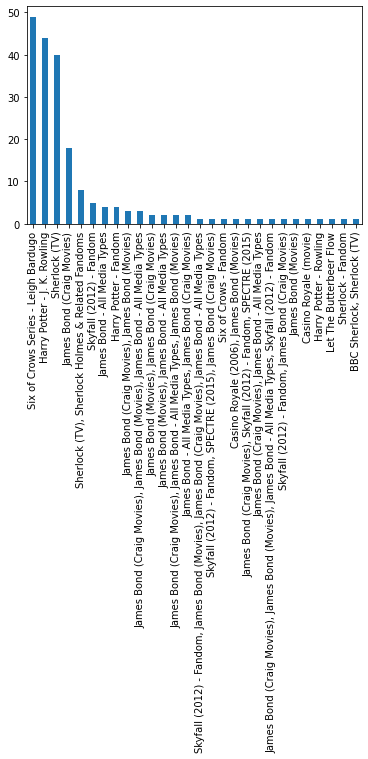

In [ ]:
#Distribution of classes
test2['fandom'].value_counts().plot(kind = 'bar')

Okay oops I was supposed to clean that stuff...

In [ ]:
## rows with multiple fandoms eliminate? 
sc = 0
mc = 0
drop = []
for i in range(len(test2)):
    fandom_list = test2['fandom'][i]
    fandom_list = fandom_list.split(",")
#     print(fandom_list)
    if len(fandom_list) == 1:
        if fandom_list[0] == 'Six of Crows Series - Leigh Bardugo':
            sc+=1
        elif fandom_list[0] == 'Sherlock (TV)' :
            sc+=1
        elif fandom_list[0] == 'James Bond (Craig Movies)' :
            sc+=1
        elif fandom_list[0] == 'Harry Potter - J. K. Rowling':
            sc+=1
        else:
            drop += [i]
    else:
        #drop the ones that are multifandom 
        drop += [i]
        mc+=1
print(drop)

print(f'{sc} that are only one fandom')
print(f'{mc} that are multifandom')    
    

[3, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 66, 67, 68, 71, 72, 74, 75, 76, 77, 81, 82, 83, 84, 85, 88, 92, 93, 94, 95, 98, 100, 101, 115, 127, 129, 142, 158, 159, 173, 177, 182, 184, 190, 192, 194, 195]
151 that are only one fandom
30 that are multifandom


In [ ]:
ROW = 0
COLUMN = 1

test2_clean = test2.drop(drop, axis=ROW)
test2_clean

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body,Body_Parsed_1
0,16238273,A Murder of Crows,['FallenRiotforSweetRevenge'],Teen And Up Audiences,"F/M, M/M",Six of Crows Series - Leigh Bardugo,"Kaz Brekker/Inej Ghafa, Jesper Fahey/Wylan Van...","Kaz Brekker, Jesper Fahey, Wylan Van Eck, Anik...","Post-Crooked Kingdom, Two Shot, My First Work ...",English,...,5173,1/2,9.0,47.0,2.0,691,"['LawlietFan27', 'sy1v13', 'SultannaMajor', 'J...",[],The Wraith's silhouette had long faded away in...,The Wraith's silhouette had long faded away in...
1,19283566,"Colm & Aditi, 1989",['zemenipearls (ayaanle)'],General Audiences,F/M,Six of Crows Series - Leigh Bardugo,Colm Fahey/Aditi Hilli,"Colm Fahey, Aditi Hilli","Alternate Universe - Modern Setting, Alternate...",English,...,451,1/1,3.0,24.0,2.0,174,"['NowNumber5', 'ahodgepodgeofthings', 'warmfuz...",[],Colm is a young Irishman studying abroad at th...,Colm is a young Irishman studying abroad at th...
2,11786106,If and When,['Higado'],Teen And Up Audiences,Gen,Six of Crows Series - Leigh Bardugo,NaN,"Kaz Brekker, Inej Ghafa, Nina Zenik, Matthias ...","A poem, because I was sad, WELL ANYWAYS, i wro...",English,...,650,2/2,7.0,23.0,2.0,310,"['LucyParnassus', 'trufelek', 'F1zzle', 'washm...",[],"\nIf the life you once knew is gone, \n\n\n\nI...","If the life you once knew is gone, If they t..."
4,13051152,"Not Brick or Stone, or Comfort in the Firelight",['metaphasia'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,NaN,Inej Ghafa,NaN,English,...,1041,1/1,3.0,51.0,7.0,480,"['annemilk', 'Lio26', 'epithet', 'sconesunderm...",[],"The Wraith slid through the water, as silent a...","The Wraith slid through the water, as silent a..."
5,32219725,pretty ballerina,['petersgwen'],General Audiences,F/M,Six of Crows Series - Leigh Bardugo,Matthias Helvar/Nina Zenik,"Matthias Helvar, Nina Zenik",NaN,English,...,1594,1/1,9.0,50.0,NaN,368,"['King0fTheFall', 'brekkered', 'heyheysogay', ...",[],"Nina moved to Ketterdam with few possessions, ...","Nina moved to Ketterdam with few possessions, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,681524,A Case of Assault,['GendrysNorthernWench'],General Audiences,Other,Sherlock (TV),NaN,"Sherlock Holmes, John Watson, Greg Lestrade, M...","Do not fuck with Sherlock, John has bad days",English,...,580,1/1,NaN,15.0,3.0,438,"['HerMajestyTheQueen', 'Dansel13', 'darkviolin...",[],John watches with mild interest as Sherlock pu...,John watches with mild interest as Sherlock pu...
196,1324303,When the Cold Bites,['idontblogforsherlockholmes'],Not Rated,NaN,Sherlock (TV),Sherlock Holmes & John Watson,NaN,"Kissing, Sexual Confusion, Unresolved Emotiona...",English,...,3383,1/1,2.0,7.0,NaN,285,"['Scarlet_angel', 'rift_bound', 'MaelaFr', 'cr...",[],Clink - Down went the black and avocado stripe...,Clink - Down went the black and avocado stripe...
197,1047637,Elimination,['MonkeyBard'],Teen And Up Audiences,NaN,Sherlock (TV),NaN,"Greg Lestrade, John Watson, Molly Hooper, Sall...","Crack, Science Fiction, Hurt/Comfort",English,...,2105,1/1,6.0,9.0,NaN,220,"['libco', 'rbarr', 'Jaybeefoxy', 'shymel', 'Tr...",[],He supposed he should be celebrating that it w...,He supposed he should be celebrating that it w...
198,894130,The Puzzle,['angelsarewatching'],Teen And Up Audiences,Gen,Sherlock (TV),NaN,"Sherlock Holmes, John Watson, Greg Lestrade",NaN,English,...,3729,1/1,NaN,2.0,NaN,222,"['SecretlyWritingFanfic', 'alexxphoenix42']",[],The Puzzle\n\nIt was pure alleviation when I h...,The Puzzle It was pure alleviation when I hea...


In [ ]:
test2_clean.to_csv('/GD/My Drive/Colab Notebooks/Fanfiction/fandom_test_clean.csv', index_label=False)  # no "index" column...


In [ ]:
df_tidy_reread = pd.read_csv('/GD/My Drive/Colab Notebooks/Fanfiction/fandom_test_clean.csv')   # encoding="utf-8" et al.
df_tidy_reread

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body,Body_Parsed_1
0,16238273,A Murder of Crows,['FallenRiotforSweetRevenge'],Teen And Up Audiences,"F/M, M/M",Six of Crows Series - Leigh Bardugo,"Kaz Brekker/Inej Ghafa, Jesper Fahey/Wylan Van...","Kaz Brekker, Jesper Fahey, Wylan Van Eck, Anik...","Post-Crooked Kingdom, Two Shot, My First Work ...",English,...,5173,1/2,9.0,47.0,2.0,691,"['LawlietFan27', 'sy1v13', 'SultannaMajor', 'J...",[],The Wraith's silhouette had long faded away in...,The Wraith's silhouette had long faded away in...
1,19283566,"Colm & Aditi, 1989",['zemenipearls (ayaanle)'],General Audiences,F/M,Six of Crows Series - Leigh Bardugo,Colm Fahey/Aditi Hilli,"Colm Fahey, Aditi Hilli","Alternate Universe - Modern Setting, Alternate...",English,...,451,1/1,3.0,24.0,2.0,174,"['NowNumber5', 'ahodgepodgeofthings', 'warmfuz...",[],Colm is a young Irishman studying abroad at th...,Colm is a young Irishman studying abroad at th...
2,11786106,If and When,['Higado'],Teen And Up Audiences,Gen,Six of Crows Series - Leigh Bardugo,NaN,"Kaz Brekker, Inej Ghafa, Nina Zenik, Matthias ...","A poem, because I was sad, WELL ANYWAYS, i wro...",English,...,650,2/2,7.0,23.0,2.0,310,"['LucyParnassus', 'trufelek', 'F1zzle', 'washm...",[],"\nIf the life you once knew is gone, \n\n\n\nI...","If the life you once knew is gone, If they t..."
4,13051152,"Not Brick or Stone, or Comfort in the Firelight",['metaphasia'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,NaN,Inej Ghafa,NaN,English,...,1041,1/1,3.0,51.0,7.0,480,"['annemilk', 'Lio26', 'epithet', 'sconesunderm...",[],"The Wraith slid through the water, as silent a...","The Wraith slid through the water, as silent a..."
5,32219725,pretty ballerina,['petersgwen'],General Audiences,F/M,Six of Crows Series - Leigh Bardugo,Matthias Helvar/Nina Zenik,"Matthias Helvar, Nina Zenik",NaN,English,...,1594,1/1,9.0,50.0,NaN,368,"['King0fTheFall', 'brekkered', 'heyheysogay', ...",[],"Nina moved to Ketterdam with few possessions, ...","Nina moved to Ketterdam with few possessions, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,681524,A Case of Assault,['GendrysNorthernWench'],General Audiences,Other,Sherlock (TV),NaN,"Sherlock Holmes, John Watson, Greg Lestrade, M...","Do not fuck with Sherlock, John has bad days",English,...,580,1/1,NaN,15.0,3.0,438,"['HerMajestyTheQueen', 'Dansel13', 'darkviolin...",[],John watches with mild interest as Sherlock pu...,John watches with mild interest as Sherlock pu...
196,1324303,When the Cold Bites,['idontblogforsherlockholmes'],Not Rated,NaN,Sherlock (TV),Sherlock Holmes & John Watson,NaN,"Kissing, Sexual Confusion, Unresolved Emotiona...",English,...,3383,1/1,2.0,7.0,NaN,285,"['Scarlet_angel', 'rift_bound', 'MaelaFr', 'cr...",[],Clink - Down went the black and avocado stripe...,Clink - Down went the black and avocado stripe...
197,1047637,Elimination,['MonkeyBard'],Teen And Up Audiences,NaN,Sherlock (TV),NaN,"Greg Lestrade, John Watson, Molly Hooper, Sall...","Crack, Science Fiction, Hurt/Comfort",English,...,2105,1/1,6.0,9.0,NaN,220,"['libco', 'rbarr', 'Jaybeefoxy', 'shymel', 'Tr...",[],He supposed he should be celebrating that it w...,He supposed he should be celebrating that it w...
198,894130,The Puzzle,['angelsarewatching'],Teen And Up Audiences,Gen,Sherlock (TV),NaN,"Sherlock Holmes, John Watson, Greg Lestrade",NaN,English,...,3729,1/1,NaN,2.0,NaN,222,"['SecretlyWritingFanfic', 'alexxphoenix42']",[],The Puzzle\n\nIt was pure alleviation when I h...,The Puzzle It was pure alleviation when I hea...


In [ ]:
test2 = df_tidy_reread

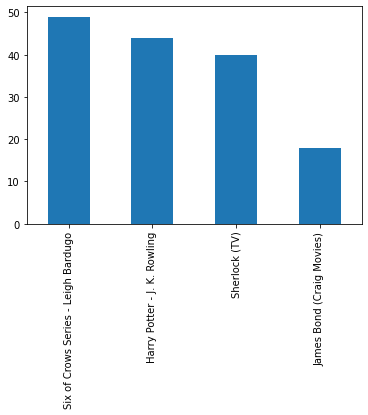

In [ ]:
#Distribution of classes
test2['fandom'].value_counts().plot(kind = 'bar')

In [ ]:
# Category mapping
test2['Fandom_Code'] = test2['fandom']
test2 = test2.replace({'Fandom_Code':fandom_codes})
test2

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body,Body_Parsed_1,Fandom_Code
0,16238273,A Murder of Crows,['FallenRiotforSweetRevenge'],Teen And Up Audiences,"F/M, M/M",Six of Crows Series - Leigh Bardugo,"Kaz Brekker/Inej Ghafa, Jesper Fahey/Wylan Van...","Kaz Brekker, Jesper Fahey, Wylan Van Eck, Anik...","Post-Crooked Kingdom, Two Shot, My First Work ...",English,...,1/2,9.0,47.0,2.0,691,"['LawlietFan27', 'sy1v13', 'SultannaMajor', 'J...",[],The Wraith's silhouette had long faded away in...,The Wraith's silhouette had long faded away in...,0
1,19283566,"Colm & Aditi, 1989",['zemenipearls (ayaanle)'],General Audiences,F/M,Six of Crows Series - Leigh Bardugo,Colm Fahey/Aditi Hilli,"Colm Fahey, Aditi Hilli","Alternate Universe - Modern Setting, Alternate...",English,...,1/1,3.0,24.0,2.0,174,"['NowNumber5', 'ahodgepodgeofthings', 'warmfuz...",[],Colm is a young Irishman studying abroad at th...,Colm is a young Irishman studying abroad at th...,0
2,11786106,If and When,['Higado'],Teen And Up Audiences,Gen,Six of Crows Series - Leigh Bardugo,NaN,"Kaz Brekker, Inej Ghafa, Nina Zenik, Matthias ...","A poem, because I was sad, WELL ANYWAYS, i wro...",English,...,2/2,7.0,23.0,2.0,310,"['LucyParnassus', 'trufelek', 'F1zzle', 'washm...",[],"\nIf the life you once knew is gone, \n\n\n\nI...","If the life you once knew is gone, If they t...",0
4,13051152,"Not Brick or Stone, or Comfort in the Firelight",['metaphasia'],General Audiences,Gen,Six of Crows Series - Leigh Bardugo,NaN,Inej Ghafa,NaN,English,...,1/1,3.0,51.0,7.0,480,"['annemilk', 'Lio26', 'epithet', 'sconesunderm...",[],"The Wraith slid through the water, as silent a...","The Wraith slid through the water, as silent a...",0
5,32219725,pretty ballerina,['petersgwen'],General Audiences,F/M,Six of Crows Series - Leigh Bardugo,Matthias Helvar/Nina Zenik,"Matthias Helvar, Nina Zenik",NaN,English,...,1/1,9.0,50.0,NaN,368,"['King0fTheFall', 'brekkered', 'heyheysogay', ...",[],"Nina moved to Ketterdam with few possessions, ...","Nina moved to Ketterdam with few possessions, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,681524,A Case of Assault,['GendrysNorthernWench'],General Audiences,Other,Sherlock (TV),NaN,"Sherlock Holmes, John Watson, Greg Lestrade, M...","Do not fuck with Sherlock, John has bad days",English,...,1/1,NaN,15.0,3.0,438,"['HerMajestyTheQueen', 'Dansel13', 'darkviolin...",[],John watches with mild interest as Sherlock pu...,John watches with mild interest as Sherlock pu...,1
196,1324303,When the Cold Bites,['idontblogforsherlockholmes'],Not Rated,NaN,Sherlock (TV),Sherlock Holmes & John Watson,NaN,"Kissing, Sexual Confusion, Unresolved Emotiona...",English,...,1/1,2.0,7.0,NaN,285,"['Scarlet_angel', 'rift_bound', 'MaelaFr', 'cr...",[],Clink - Down went the black and avocado stripe...,Clink - Down went the black and avocado stripe...,1
197,1047637,Elimination,['MonkeyBard'],Teen And Up Audiences,NaN,Sherlock (TV),NaN,"Greg Lestrade, John Watson, Molly Hooper, Sall...","Crack, Science Fiction, Hurt/Comfort",English,...,1/1,6.0,9.0,NaN,220,"['libco', 'rbarr', 'Jaybeefoxy', 'shymel', 'Tr...",[],He supposed he should be celebrating that it w...,He supposed he should be celebrating that it w...,1
198,894130,The Puzzle,['angelsarewatching'],Teen And Up Audiences,Gen,Sherlock (TV),NaN,"Sherlock Holmes, John Watson, Greg Lestrade",NaN,English,...,1/1,NaN,2.0,NaN,222,"['SecretlyWritingFanfic', 'alexxphoenix42']",[],The Puzzle\n\nIt was pure alleviation when I h...,The Puzzle It was pure alleviation when I hea...,1


In [ ]:
print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)
print("Test Set Shape :", test2.shape)

Training Set Shape : (176, 8)
Validation Set Shape : (44, 8)
Test Set Shape : (151, 24)


In [ ]:
pred_sentences = list(test2['Body_Parsed_1'])

In [ ]:
predictions = getPrediction(pred_sentences)

INFO:tensorflow:Writing example 0 of 151


INFO:tensorflow:Writing example 0 of 151


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] the wr ##aith ' s silhouette had long faded away into the distance , gliding across the waves away from fifth harbor and away from ke ##tter ##dam . the crowd of dr ##eg ##s who had come to see off their fearless wr ##aith had slowly d ##wind ##led away as the ship disappeared over the horizon . everyone had dispersed by the time the sky began to tin ##t pink and the street ##lights were turned on . everyone except ka ##z br ##ek ##ker . ka ##z still stood at the docks , putting more weight on his crow - headed cane than he cared to admit . he knew this day would come . she had told him on the fe ##rol ##ind about her dream of fighting slave ##rs and freeing children who had fallen into the same mis ##fort ##une as her . " purpose . you know you can ' t stop them all . " had been his response . " if i don ' t try , i won ' t stop any . " " then i almost pity the slave ##rs . they have no idea what ' s coming for them . " he knew it would be cruel of him to

INFO:tensorflow:tokens: [CLS] the wr ##aith ' s silhouette had long faded away into the distance , gliding across the waves away from fifth harbor and away from ke ##tter ##dam . the crowd of dr ##eg ##s who had come to see off their fearless wr ##aith had slowly d ##wind ##led away as the ship disappeared over the horizon . everyone had dispersed by the time the sky began to tin ##t pink and the street ##lights were turned on . everyone except ka ##z br ##ek ##ker . ka ##z still stood at the docks , putting more weight on his crow - headed cane than he cared to admit . he knew this day would come . she had told him on the fe ##rol ##ind about her dream of fighting slave ##rs and freeing children who had fallen into the same mis ##fort ##une as her . " purpose . you know you can ' t stop them all . " had been his response . " if i don ' t try , i won ' t stop any . " " then i almost pity the slave ##rs . they have no idea what ' s coming for them . " he knew it would be cruel of him to

INFO:tensorflow:input_ids: 101 1996 23277 22465 1005 1055 21776 2018 2146 8105 2185 2046 1996 3292 1010 20292 2408 1996 5975 2185 2013 3587 6496 1998 2185 2013 17710 12079 17130 1012 1996 4306 1997 2852 13910 2015 2040 2018 2272 2000 2156 2125 2037 22518 23277 22465 2018 3254 1040 11101 3709 2185 2004 1996 2911 5419 2058 1996 9154 1012 3071 2018 15484 2011 1996 2051 1996 3712 2211 2000 9543 2102 5061 1998 1996 2395 15733 2020 2357 2006 1012 3071 3272 10556 2480 7987 5937 5484 1012 10556 2480 2145 2768 2012 1996 15093 1010 5128 2062 3635 2006 2010 11465 1011 3753 11942 2084 2002 8725 2000 6449 1012 2002 2354 2023 2154 2052 2272 1012 2016 2018 2409 2032 2006 1996 10768 13153 22254 2055 2014 3959 1997 3554 6658 2869 1998 22198 2336 2040 2018 5357 2046 1996 2168 28616 13028 9816 2004 2014 1012 1000 3800 1012 2017 2113 2017 2064 1005 1056 2644 2068 2035 1012 1000 2018 2042 2010 3433 1012 1000 2065 1045 2123 1005 1056 3046 1010 1045 2180 1005 1056 2644 2151 1012 1000 1000 2059 1045 2471 1206

INFO:tensorflow:input_ids: 101 1996 23277 22465 1005 1055 21776 2018 2146 8105 2185 2046 1996 3292 1010 20292 2408 1996 5975 2185 2013 3587 6496 1998 2185 2013 17710 12079 17130 1012 1996 4306 1997 2852 13910 2015 2040 2018 2272 2000 2156 2125 2037 22518 23277 22465 2018 3254 1040 11101 3709 2185 2004 1996 2911 5419 2058 1996 9154 1012 3071 2018 15484 2011 1996 2051 1996 3712 2211 2000 9543 2102 5061 1998 1996 2395 15733 2020 2357 2006 1012 3071 3272 10556 2480 7987 5937 5484 1012 10556 2480 2145 2768 2012 1996 15093 1010 5128 2062 3635 2006 2010 11465 1011 3753 11942 2084 2002 8725 2000 6449 1012 2002 2354 2023 2154 2052 2272 1012 2016 2018 2409 2032 2006 1996 10768 13153 22254 2055 2014 3959 1997 3554 6658 2869 1998 22198 2336 2040 2018 5357 2046 1996 2168 28616 13028 9816 2004 2014 1012 1000 3800 1012 2017 2113 2017 2064 1005 1056 2644 2068 2035 1012 1000 2018 2042 2010 3433 1012 1000 2065 1045 2123 1005 1056 3046 1010 1045 2180 1005 1056 2644 2151 1012 1000 1000 2059 1045 2471 1206

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] col ##m is a young irish ##man studying abroad at the university of georgia . it ' s the late 80s - over a decade until the good friday agreement would be signed , the tail end of the cold war , and a few years until the l . a . riots would bring police brutality to the forefront of america ' s attention . col ##m is a hard ##working man with red hair and a quiet voice . adi ##ti is viva ##cious and studying biochemistry . he is stricken by her - long box braid ##s and hoop earrings , una ##bas ##hed ##ly smart and beautiful . they ' re taking organic chemistry together and he can ' t help staring at her . everything about her was different from home . he was from a quiet town , more like a hamlet . she was from harlem , a city girl in an area beginning to see the devastating effects of the " war on drugs " and gen ##tri ##fication . not only was he white , but he was irish . black american culture was a world apart . they seemed like opposite ##s , but he

INFO:tensorflow:tokens: [CLS] col ##m is a young irish ##man studying abroad at the university of georgia . it ' s the late 80s - over a decade until the good friday agreement would be signed , the tail end of the cold war , and a few years until the l . a . riots would bring police brutality to the forefront of america ' s attention . col ##m is a hard ##working man with red hair and a quiet voice . adi ##ti is viva ##cious and studying biochemistry . he is stricken by her - long box braid ##s and hoop earrings , una ##bas ##hed ##ly smart and beautiful . they ' re taking organic chemistry together and he can ' t help staring at her . everything about her was different from home . he was from a quiet town , more like a hamlet . she was from harlem , a city girl in an area beginning to see the devastating effects of the " war on drugs " and gen ##tri ##fication . not only was he white , but he was irish . black american culture was a world apart . they seemed like opposite ##s , but he

INFO:tensorflow:input_ids: 101 8902 2213 2003 1037 2402 3493 2386 5702 6917 2012 1996 2118 1997 4108 1012 2009 1005 1055 1996 2397 16002 1011 2058 1037 5476 2127 1996 2204 5958 3820 2052 2022 2772 1010 1996 5725 2203 1997 1996 3147 2162 1010 1998 1037 2261 2086 2127 1996 1048 1012 1037 1012 12925 2052 3288 2610 24083 2000 1996 22870 1997 2637 1005 1055 3086 1012 8902 2213 2003 1037 2524 21398 2158 2007 2417 2606 1998 1037 4251 2376 1012 27133 3775 2003 20022 18436 1998 5702 22419 1012 2002 2003 16654 2011 2014 1011 2146 3482 24148 2015 1998 27669 27212 1010 14477 22083 9072 2135 6047 1998 3376 1012 2027 1005 2128 2635 7554 6370 2362 1998 2002 2064 1005 1056 2393 4582 2012 2014 1012 2673 2055 2014 2001 2367 2013 2188 1012 2002 2001 2013 1037 4251 2237 1010 2062 2066 1037 8429 1012 2016 2001 2013 14864 1010 1037 2103 2611 1999 2019 2181 2927 2000 2156 1996 14886 3896 1997 1996 1000 2162 2006 5850 1000 1998 8991 18886 10803 1012 2025 2069 2001 2002 2317 1010 2021 2002 2001 3493 1012 2304 

INFO:tensorflow:input_ids: 101 8902 2213 2003 1037 2402 3493 2386 5702 6917 2012 1996 2118 1997 4108 1012 2009 1005 1055 1996 2397 16002 1011 2058 1037 5476 2127 1996 2204 5958 3820 2052 2022 2772 1010 1996 5725 2203 1997 1996 3147 2162 1010 1998 1037 2261 2086 2127 1996 1048 1012 1037 1012 12925 2052 3288 2610 24083 2000 1996 22870 1997 2637 1005 1055 3086 1012 8902 2213 2003 1037 2524 21398 2158 2007 2417 2606 1998 1037 4251 2376 1012 27133 3775 2003 20022 18436 1998 5702 22419 1012 2002 2003 16654 2011 2014 1011 2146 3482 24148 2015 1998 27669 27212 1010 14477 22083 9072 2135 6047 1998 3376 1012 2027 1005 2128 2635 7554 6370 2362 1998 2002 2064 1005 1056 2393 4582 2012 2014 1012 2673 2055 2014 2001 2367 2013 2188 1012 2002 2001 2013 1037 4251 2237 1010 2062 2066 1037 8429 1012 2016 2001 2013 14864 1010 1037 2103 2611 1999 2019 2181 2927 2000 2156 1996 14886 3896 1997 1996 1000 2162 2006 5850 1000 1998 8991 18886 10803 1012 2025 2069 2001 2002 2317 1010 2021 2002 2001 3493 1012 2304 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] if the life you once knew is gone , if they took you from your land , if you were lured in with the promise of a home , if you were forced to perform , i pray for you , no matter who you serve , greed or salvation , it does not matter who your saints are , or the prayers you say , it only matters that you are safe , you will beat the force that tries to keep you down , and i hope these words wash over you , like the for ##giving rain , that wash ##es away all your sins leaving you as you once were , if your hate is directed at the one you love , if the pride for your country gets in in the way of life , when who you are is used against you , when you are forced to believe in what you do not , i hope you can overcome , the troubles that you were forced to see , i want to see you rise , raise the dead and fight for your life , no matter if your power changed , you are still one with another , if you were beaten for what you cannot , for listening to your own

INFO:tensorflow:tokens: [CLS] if the life you once knew is gone , if they took you from your land , if you were lured in with the promise of a home , if you were forced to perform , i pray for you , no matter who you serve , greed or salvation , it does not matter who your saints are , or the prayers you say , it only matters that you are safe , you will beat the force that tries to keep you down , and i hope these words wash over you , like the for ##giving rain , that wash ##es away all your sins leaving you as you once were , if your hate is directed at the one you love , if the pride for your country gets in in the way of life , when who you are is used against you , when you are forced to believe in what you do not , i hope you can overcome , the troubles that you were forced to see , i want to see you rise , raise the dead and fight for your life , no matter if your power changed , you are still one with another , if you were beaten for what you cannot , for listening to your own

INFO:tensorflow:input_ids: 101 2065 1996 2166 2017 2320 2354 2003 2908 1010 2065 2027 2165 2017 2013 2115 2455 1010 2065 2017 2020 26673 1999 2007 1996 4872 1997 1037 2188 1010 2065 2017 2020 3140 2000 4685 1010 1045 11839 2005 2017 1010 2053 3043 2040 2017 3710 1010 22040 2030 12611 1010 2009 2515 2025 3043 2040 2115 6586 2024 1010 2030 1996 12583 2017 2360 1010 2009 2069 5609 2008 2017 2024 3647 1010 2017 2097 3786 1996 2486 2008 5363 2000 2562 2017 2091 1010 1998 1045 3246 2122 2616 9378 2058 2017 1010 2066 1996 2005 23795 4542 1010 2008 9378 2229 2185 2035 2115 15516 2975 2017 2004 2017 2320 2020 1010 2065 2115 5223 2003 2856 2012 1996 2028 2017 2293 1010 2065 1996 6620 2005 2115 2406 4152 1999 1999 1996 2126 1997 2166 1010 2043 2040 2017 2024 2003 2109 2114 2017 1010 2043 2017 2024 3140 2000 2903 1999 2054 2017 2079 2025 1010 1045 3246 2017 2064 9462 1010 1996 13460 2008 2017 2020 3140 2000 2156 1010 1045 2215 2000 2156 2017 4125 1010 5333 1996 2757 1998 2954 2005 2115 2166 1010 2

INFO:tensorflow:input_ids: 101 2065 1996 2166 2017 2320 2354 2003 2908 1010 2065 2027 2165 2017 2013 2115 2455 1010 2065 2017 2020 26673 1999 2007 1996 4872 1997 1037 2188 1010 2065 2017 2020 3140 2000 4685 1010 1045 11839 2005 2017 1010 2053 3043 2040 2017 3710 1010 22040 2030 12611 1010 2009 2515 2025 3043 2040 2115 6586 2024 1010 2030 1996 12583 2017 2360 1010 2009 2069 5609 2008 2017 2024 3647 1010 2017 2097 3786 1996 2486 2008 5363 2000 2562 2017 2091 1010 1998 1045 3246 2122 2616 9378 2058 2017 1010 2066 1996 2005 23795 4542 1010 2008 9378 2229 2185 2035 2115 15516 2975 2017 2004 2017 2320 2020 1010 2065 2115 5223 2003 2856 2012 1996 2028 2017 2293 1010 2065 1996 6620 2005 2115 2406 4152 1999 1999 1996 2126 1997 2166 1010 2043 2040 2017 2024 2003 2109 2114 2017 1010 2043 2017 2024 3140 2000 2903 1999 2054 2017 2079 2025 1010 1045 3246 2017 2064 9462 1010 1996 13460 2008 2017 2020 3140 2000 2156 1010 1045 2215 2000 2156 2017 4125 1010 5333 1996 2757 1998 2954 2005 2115 2166 1010 2

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] the wr ##aith slid through the water , as silent as her namesake and captain . the sea was as dark as the hull , black under the night sky . the black ship was more visible through the way that it b ##lot ##ted out the slight reflections of stars on the waves than through any actual light or color of its own . in ##ej laid down at the top of the mast ; she had claimed the spot as her own private san ##ctum early on , and retreated there whenever there was a lu ##ll in activity on board . it made her feel secure ; it wasn ' t just that it was the highest point on the ship , and the long years in ke ##tter ##dam had taught her to associate height with safety , where few dared to follow her , or even that the very name of the crow ' s nest reminded her of ka ##z . the sul ##i lacked lands , and their nomadic nature had caused them to develop a number of traditions unlike those of other nationalities . her father had taught her when she was young , young enoug

INFO:tensorflow:tokens: [CLS] the wr ##aith slid through the water , as silent as her namesake and captain . the sea was as dark as the hull , black under the night sky . the black ship was more visible through the way that it b ##lot ##ted out the slight reflections of stars on the waves than through any actual light or color of its own . in ##ej laid down at the top of the mast ; she had claimed the spot as her own private san ##ctum early on , and retreated there whenever there was a lu ##ll in activity on board . it made her feel secure ; it wasn ' t just that it was the highest point on the ship , and the long years in ke ##tter ##dam had taught her to associate height with safety , where few dared to follow her , or even that the very name of the crow ' s nest reminded her of ka ##z . the sul ##i lacked lands , and their nomadic nature had caused them to develop a number of traditions unlike those of other nationalities . her father had taught her when she was young , young enoug

INFO:tensorflow:input_ids: 101 1996 23277 22465 4934 2083 1996 2300 1010 2004 4333 2004 2014 17283 1998 2952 1012 1996 2712 2001 2004 2601 2004 1996 6738 1010 2304 2104 1996 2305 3712 1012 1996 2304 2911 2001 2062 5710 2083 1996 2126 2008 2009 1038 10994 3064 2041 1996 7263 16055 1997 3340 2006 1996 5975 2084 2083 2151 5025 2422 2030 3609 1997 2049 2219 1012 1999 20518 4201 2091 2012 1996 2327 1997 1996 15429 1025 2016 2018 3555 1996 3962 2004 2014 2219 2797 2624 27272 2220 2006 1010 1998 11672 2045 7188 2045 2001 1037 11320 3363 1999 4023 2006 2604 1012 2009 2081 2014 2514 5851 1025 2009 2347 1005 1056 2074 2008 2009 2001 1996 3284 2391 2006 1996 2911 1010 1998 1996 2146 2086 1999 17710 12079 17130 2018 4036 2014 2000 5482 4578 2007 3808 1010 2073 2261 15048 2000 3582 2014 1010 2030 2130 2008 1996 2200 2171 1997 1996 11465 1005 1055 9089 6966 2014 1997 10556 2480 1012 1996 21396 2072 10858 4915 1010 1998 2037 21702 3267 2018 3303 2068 2000 4503 1037 2193 1997 7443 4406 2216 1997 2060 

INFO:tensorflow:input_ids: 101 1996 23277 22465 4934 2083 1996 2300 1010 2004 4333 2004 2014 17283 1998 2952 1012 1996 2712 2001 2004 2601 2004 1996 6738 1010 2304 2104 1996 2305 3712 1012 1996 2304 2911 2001 2062 5710 2083 1996 2126 2008 2009 1038 10994 3064 2041 1996 7263 16055 1997 3340 2006 1996 5975 2084 2083 2151 5025 2422 2030 3609 1997 2049 2219 1012 1999 20518 4201 2091 2012 1996 2327 1997 1996 15429 1025 2016 2018 3555 1996 3962 2004 2014 2219 2797 2624 27272 2220 2006 1010 1998 11672 2045 7188 2045 2001 1037 11320 3363 1999 4023 2006 2604 1012 2009 2081 2014 2514 5851 1025 2009 2347 1005 1056 2074 2008 2009 2001 1996 3284 2391 2006 1996 2911 1010 1998 1996 2146 2086 1999 17710 12079 17130 2018 4036 2014 2000 5482 4578 2007 3808 1010 2073 2261 15048 2000 3582 2014 1010 2030 2130 2008 1996 2200 2171 1997 1996 11465 1005 1055 9089 6966 2014 1997 10556 2480 1012 1996 21396 2072 10858 4915 1010 1998 2037 21702 3267 2018 3303 2068 2000 4503 1037 2193 1997 7443 4406 2216 1997 2060 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] nina moved to ke ##tter ##dam with few possessions , and in her year of living there , she ' d acquired exactly one thing worth anything - a single , delicate gold bracelet . it was a gift from a particularly anxious client of the white rose , a man whose face she could barely place except for the vague memories of an up ##turn ##ed nose and comical ##ly large ears who ' d been overly grateful for her services . she ' d kept it in the little drawer in her room , unsure , really of what to do with it . her wrists were of a gr ##isha ' s ; far too valuable , far too busy to be held back by a band , no matter how precious . nina had never owned much , less so when it came to jewelry - but she did own something that mattered far more . every time she looked at the bracelet , asked herself what she could do with it - gift it to in ##ej , perhaps , or sell it in the ke ##rch market - she ' d catch herself he ##sit ##ating . a piece so fine would fit perfectly in

INFO:tensorflow:tokens: [CLS] nina moved to ke ##tter ##dam with few possessions , and in her year of living there , she ' d acquired exactly one thing worth anything - a single , delicate gold bracelet . it was a gift from a particularly anxious client of the white rose , a man whose face she could barely place except for the vague memories of an up ##turn ##ed nose and comical ##ly large ears who ' d been overly grateful for her services . she ' d kept it in the little drawer in her room , unsure , really of what to do with it . her wrists were of a gr ##isha ' s ; far too valuable , far too busy to be held back by a band , no matter how precious . nina had never owned much , less so when it came to jewelry - but she did own something that mattered far more . every time she looked at the bracelet , asked herself what she could do with it - gift it to in ##ej , perhaps , or sell it in the ke ##rch market - she ' d catch herself he ##sit ##ating . a piece so fine would fit perfectly in

INFO:tensorflow:input_ids: 101 9401 2333 2000 17710 12079 17130 2007 2261 13689 1010 1998 1999 2014 2095 1997 2542 2045 1010 2016 1005 1040 3734 3599 2028 2518 4276 2505 1011 1037 2309 1010 10059 2751 19688 1012 2009 2001 1037 5592 2013 1037 3391 11480 7396 1997 1996 2317 3123 1010 1037 2158 3005 2227 2016 2071 4510 2173 3272 2005 1996 13727 5758 1997 2019 2039 22299 2098 4451 1998 29257 2135 2312 5551 2040 1005 1040 2042 15241 8794 2005 2014 2578 1012 2016 1005 1040 2921 2009 1999 1996 2210 13065 1999 2014 2282 1010 12422 1010 2428 1997 2054 2000 2079 2007 2009 1012 2014 12150 2020 1997 1037 24665 24032 1005 1055 1025 2521 2205 7070 1010 2521 2205 5697 2000 2022 2218 2067 2011 1037 2316 1010 2053 3043 2129 9062 1012 9401 2018 2196 3079 2172 1010 2625 2061 2043 2009 2234 2000 11912 1011 2021 2016 2106 2219 2242 2008 13836 2521 2062 1012 2296 2051 2016 2246 2012 1996 19688 1010 2356 2841 2054 2016 2071 2079 2007 2009 1011 5592 2009 2000 1999 20518 1010 3383 1010 2030 5271 2009 1999 1996

INFO:tensorflow:input_ids: 101 9401 2333 2000 17710 12079 17130 2007 2261 13689 1010 1998 1999 2014 2095 1997 2542 2045 1010 2016 1005 1040 3734 3599 2028 2518 4276 2505 1011 1037 2309 1010 10059 2751 19688 1012 2009 2001 1037 5592 2013 1037 3391 11480 7396 1997 1996 2317 3123 1010 1037 2158 3005 2227 2016 2071 4510 2173 3272 2005 1996 13727 5758 1997 2019 2039 22299 2098 4451 1998 29257 2135 2312 5551 2040 1005 1040 2042 15241 8794 2005 2014 2578 1012 2016 1005 1040 2921 2009 1999 1996 2210 13065 1999 2014 2282 1010 12422 1010 2428 1997 2054 2000 2079 2007 2009 1012 2014 12150 2020 1997 1037 24665 24032 1005 1055 1025 2521 2205 7070 1010 2521 2205 5697 2000 2022 2218 2067 2011 1037 2316 1010 2053 3043 2129 9062 1012 9401 2018 2196 3079 2172 1010 2625 2061 2043 2009 2234 2000 11912 1011 2021 2016 2106 2219 2242 2008 13836 2521 2062 1012 2296 2051 2016 2246 2012 1996 19688 1010 2356 2841 2054 2016 2071 2079 2007 2009 1011 5592 2009 2000 1999 20518 1010 3383 1010 2030 5271 2009 1999 1996

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [ ]:
predictions[0]

('The Wraith\'s silhouette had long faded away into the distance, gliding across the waves away from Fifth harbor and away from Ketterdam. The crowd of Dregs who had come to see off their fearless Wraith had slowly dwindled away as the ship disappeared over the horizon. Everyone had dispersed by the time the sky began to tint pink and the streetlights were turned on.  Everyone except Kaz Brekker. Kaz still stood at the docks, putting more weight on his crow-headed cane than he cared to admit. He knew this day would come. She had told him on the Ferolind about her dream of fighting slavers and freeing children who had fallen into the same misfortune as her.  "Purpose. You know you can\'t stop them all." had been his response.  "If I don\'t try, I won\'t stop any."  "Then I almost pity the slavers. They have no idea what\'s coming for them." He knew it would be cruel of him to keep her from her destiny. Even Dirtyhands couldn\'t get in the way of her and her dreams. Even Dirtyhands cring

In [ ]:
enc_labels = []
act_labels = []
for i in range(len(predictions)):
  enc_labels.append(predictions[i][2])
  act_labels.append(predictions[i][3])

In [ ]:
pd.DataFrame(enc_labels, columns = ['SECTION']).to_csv('/GD/My Drive/Colab Notebooks/Fanfiction/fandom_test_1.csv', index = False)

In [ ]:
test_results = pd.read_csv('/GD/My Drive/Colab Notebooks/Fanfiction/fandom_test_1.csv')
test_results

,SECTION
0,0
1,3
2,3
3,0
4,0
...,...
146,1
147,1
148,3
149,1


In [ ]:
correct = 0
for i in range(len(test_results)):
   if i not in drop:
      if test_results['SECTION'][i] == test2['Fandom_Code'][i]:
        correct +=1
print(f"{correct} out of {len(test_results)}")
print(f"{(correct/len(test_results))*100} % were correct")

37 out of 151
24.503311258278146 % were correct


In [ ]:
##okay that's pretty bad?

## Random Tester

In [ ]:
#Classifying random sentences
tests = getPrediction(['Sherlock Holmes is fat and squishy ',
                       'James Bond will give us big kisses',
                       'Harry Potter you are a wizard',
                       'Kaz ate cheese and bread and Inej loved it '
                       ])

INFO:tensorflow:Writing example 0 of 4


INFO:tensorflow:Writing example 0 of 4


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] sherlock holmes is fat and sq ##uis ##hy [SEP]


INFO:tensorflow:tokens: [CLS] sherlock holmes is fat and sq ##uis ##hy [SEP]


INFO:tensorflow:input_ids: 101 20052 9106 2003 6638 1998 5490 27020 10536 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_ids: 101 20052 9106 2003 6638 1998 5490 27020 10536 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] james bond will give us big kisses [SEP]


INFO:tensorflow:tokens: [CLS] james bond will give us big kisses [SEP]


INFO:tensorflow:input_ids: 101 2508 5416 2097 2507 2149 2502 8537 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_ids: 101 2508 5416 2097 2507 2149 2502 8537 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] harry potter you are a wizard [SEP]


INFO:tensorflow:tokens: [CLS] harry potter you are a wizard [SEP]


INFO:tensorflow:input_ids: 101 4302 10693 2017 2024 1037 10276 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:input_ids: 101 4302 10693 2017 2024 1037 10276 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] ka ##z ate cheese and bread and in ##ej loved it [SEP]


INFO:tensorflow:tokens: [CLS] ka ##z ate cheese and bread and in ##ej loved it [SEP]


INFO:tensorflow:input_ids: 101 10556 2480 8823 8808 1998 7852 1998 1999 20518 3866 2009 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_ids: 101 10556 2480 8823 8808 1998 7852 1998 1999 20518 3866 2009 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [ ]:
tests

[('Sherlock Holmes is fat and squishy ',
  array([-1.9685808, -1.1550671, -1.5387866, -1.1066425], dtype=float32),
  3,
  'Harry Potter - J. K. Rowling'),
 ('James Bond will give us big kisses',
  array([-1.5714798 , -0.92925996, -1.6965555 , -1.5412986 ], dtype=float32),
  1,
  'Sherlock (TV)'),
 ('Harry Potter you are a wizard',
  array([-1.6427301, -1.0901413, -1.613224 , -1.305136 ], dtype=float32),
  1,
  'Sherlock (TV)'),
 ('Kaz ate cheese and bread and Inej loved it ',
  array([-1.217266 , -1.1866155, -1.6559124, -1.5712221], dtype=float32),
  1,
  'Sherlock (TV)')]

In [ ]:
tests = getPrediction(['Sherlock Holmes and John Watson are detectives. murder by death',
                       'James Bond and Q and spies and agent',
                       'Harry Potter and Hermione were hiding under a tree',
                       'Kaz Brekker attacked a gang member. Inej Ghafa and Jesper sneaky sneaky'
                       ])

INFO:tensorflow:Writing example 0 of 4


INFO:tensorflow:Writing example 0 of 4


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] sherlock holmes and john watson are detectives . murder by death [SEP]


INFO:tensorflow:tokens: [CLS] sherlock holmes and john watson are detectives . murder by death [SEP]


INFO:tensorflow:input_ids: 101 20052 9106 1998 2198 7908 2024 18145 1012 4028 2011 2331 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_ids: 101 20052 9106 1998 2198 7908 2024 18145 1012 4028 2011 2331 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] james bond and q and spies and agent [SEP]


INFO:tensorflow:tokens: [CLS] james bond and q and spies and agent [SEP]


INFO:tensorflow:input_ids: 101 2508 5416 1998 1053 1998 16794 1998 4005 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_ids: 101 2508 5416 1998 1053 1998 16794 1998 4005 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] harry potter and her ##mi ##one were hiding under a tree [SEP]


INFO:tensorflow:tokens: [CLS] harry potter and her ##mi ##one were hiding under a tree [SEP]


INFO:tensorflow:input_ids: 101 4302 10693 1998 2014 4328 5643 2020 6318 2104 1037 3392 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:input_ids: 101 4302 10693 1998 2014 4328 5643 2020 6318 2104 1037 3392 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] ka ##z br ##ek ##ker attacked a gang member . in ##ej g ##ha ##fa and je ##sper sneak ##y sneak ##y [SEP]


INFO:tensorflow:tokens: [CLS] ka ##z br ##ek ##ker attacked a gang member . in ##ej g ##ha ##fa and je ##sper sneak ##y sneak ##y [SEP]


INFO:tensorflow:input_ids: 101 10556 2480 7987 5937 5484 4457 1037 6080 2266 1012 1999 20518 1043 3270 7011 1998 15333 17668 13583 2100 13583 2100 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:input_ids: 101 10556 2480 7987 5937 5484 4457 1037 6080 2266 1012 1999 20518 1043 3270 7011 1998 15333 17668 13583 2100 13583 2100 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Restoring parameters from /GD/My Drive/Colab Notebooks/BERT/bert_fandom_category/model.ckpt-16


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [ ]:
tests

[('Sherlock Holmes and John Watson are detectives. murder by death',
  array([-1.5295238, -0.9223255, -1.7420809, -1.5577364], dtype=float32),
  1,
  'Sherlock (TV)'),
 ('James Bond and Q and spies and agent',
  array([-1.6237768, -0.9940066, -1.7973769, -1.3204191], dtype=float32),
  1,
  'Sherlock (TV)'),
 ('Harry Potter and Hermione were hiding under a tree',
  array([-1.7414329, -1.1087105, -1.7206224, -1.1526718], dtype=float32),
  1,
  'Sherlock (TV)'),
 ('Kaz Brekker attacked a gang member. Inej Ghafa and Jesper sneaky sneaky',
  array([-1.3873386, -1.227545 , -1.7700474, -1.2485342], dtype=float32),
  1,
  'Sherlock (TV)')]

Wait that's pretty good... lol it got ... 50% ...of them..